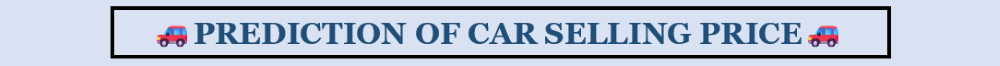

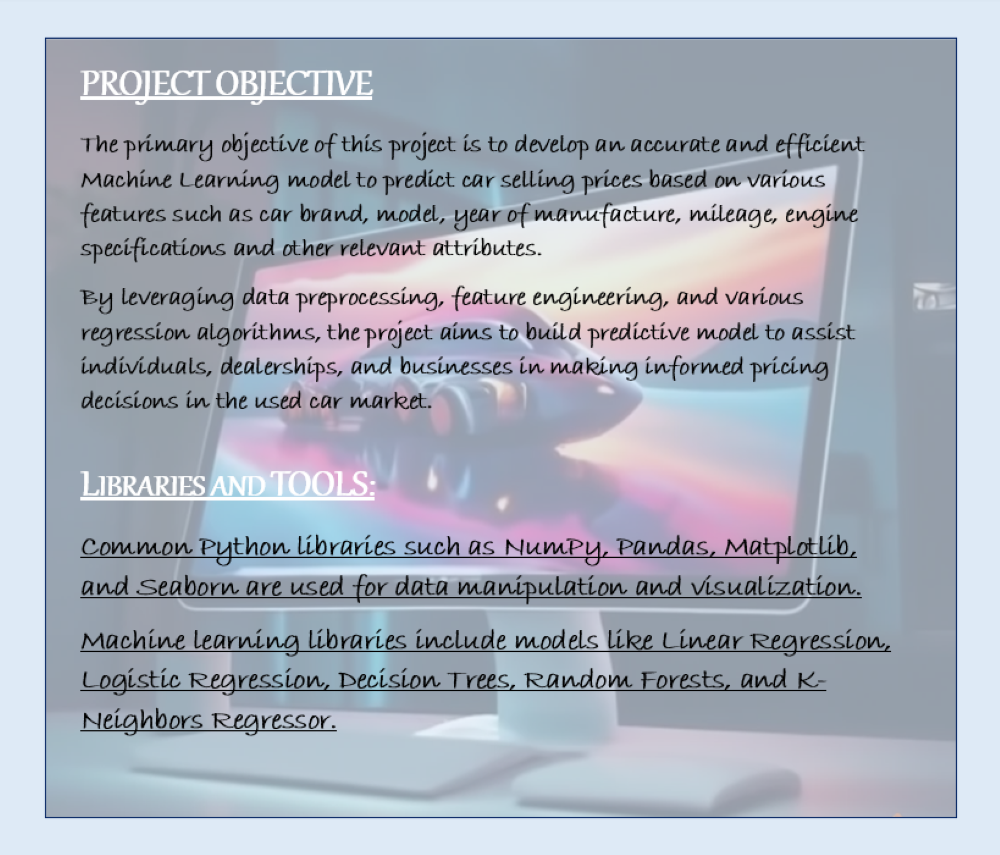

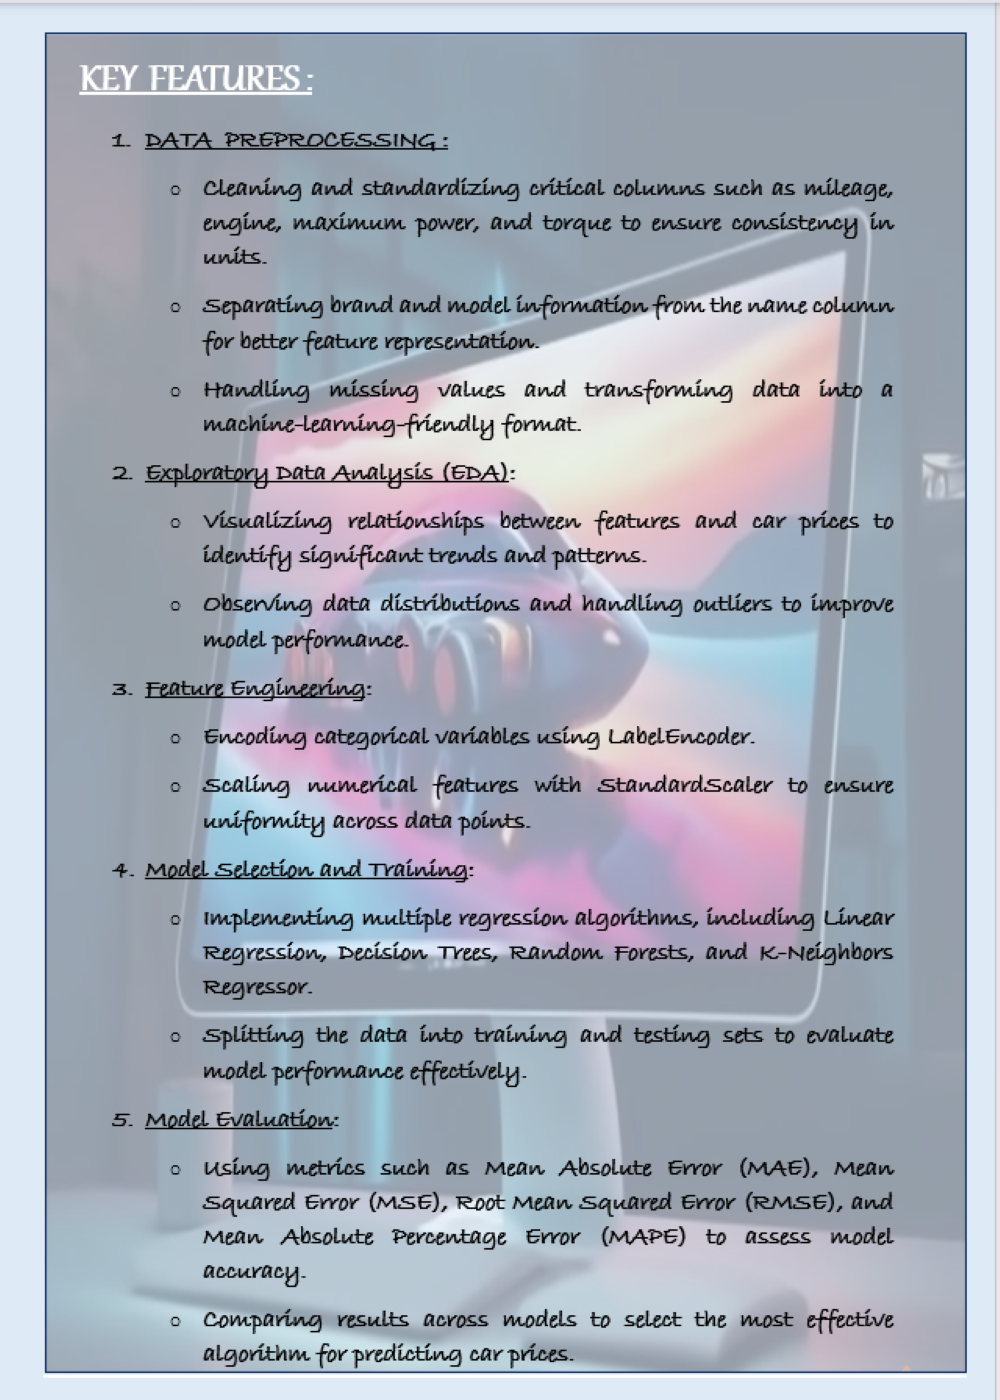

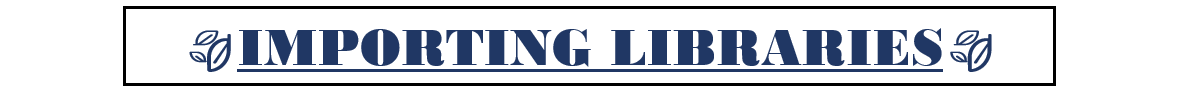

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
import re
sns.set(style="darkgrid",font_scale=1.2)

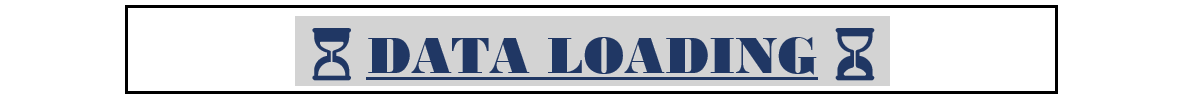

In [5]:
link = "C:/Users/prerna/OneDrive/Desktop/Car details v3.csv"

In [6]:
df = pd.read_csv(link)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

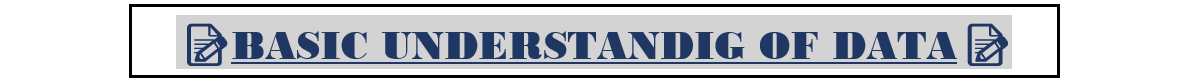

In [7]:
x = df.shape
print(f"There are total {x[0]} rows and {x[1]} columns in the dataset.")

There are total 8128 rows and 13 columns in the dataset.


In [8]:
df.dtypes.to_frame().rename(columns={0:"Data Types"})
# It shows the data type of each column.

Data Types
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64

In [9]:
df.isna().sum().to_frame()
# It shows the null values from dataset. 

0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage        221
engine         221
max_power      215
torque         222
seats          221

In [10]:
null_df = df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing values"] = round(100*null_df["Total No. of Missing Values"]/len(df),2)
null_df.sort_values(by="% of Missing values",ascending=False)

Total No. of Missing Values  % of Missing values
torque                             222                 2.73
mileage                            221                 2.72
engine                             221                 2.72
seats                              221                 2.72
max_power                          215                 2.65

In [11]:
df.info()
# It gives the basic information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
df.describe()
# Describing the numerical variables by showing the possible statistical values.

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [13]:
df_categorical_variables = pd.DataFrame(df,columns = ["fuel","seller_type","transmission","owner"])
df_categorical_variables.describe()
# Describing the categorical variables.

fuel seller_type transmission        owner
count     8128        8128         8128         8128
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      4402        6766         7078         5289

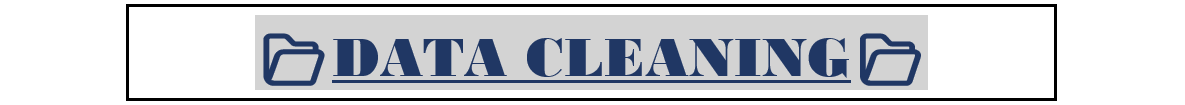

### Separating brand and model from the name column and deleting name column.

In [14]:
l = lambda x: x.split()[0]
df["Brand"] = df["name"].apply(l)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats    Brand  
0            190Nm@ 2000rpm    5.0   Maruti  
1       250Nm@ 1500-2500rpm    5.0    Skoda  
2     12.7@ 2,700(kgm@ rpm)    5.0    Honda  
3  22.4 kgm at 1750-2750rpm    5.0  Hyundai  
4     11.5@ 4,500(kgm@ rpm)    5.0   Maruti

In [15]:
def model(x):
    x = x.split()
    x = x[1:]
    x = " ".join(x)
    return x

In [16]:
df["Model"] = df["name"].apply(model)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats    Brand                   Model  
0            190Nm@ 2000rpm    5.0   Maruti         Swift Dzire VDI  
1       250Nm@ 1500-2500rpm    5.0    Skoda  Rapid 1.5 TDI Ambition  
2     12.7@ 2,700(kgm@ rpm)    5.0    Honda      City 2017-2020 EXi  
3  22.4 kgm at 1750-2750rpm    5.0  Hyundai       i20 Sportz Diesel  
4     11.5@ 4,500(kgm@ rpm)    5.0   Maruti         Swift VXI BSIII

In [17]:
df.drop(columns=["name"],inplace=True)

In [18]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner     mileage   engine   max_power                    torque  \
0   First Owner   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm   
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm   
2   Third Owner   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)   
3   First Owner   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm   
4   First Owner   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)   

   seats    Brand                   Model  
0    5.0   Maruti         Swift Dzire VDI  
1    5.0    Skoda  Rapid 1.5 TDI Ambition  
2    5.0    Honda      City 2017-2020 EXi  
3    5.0  Hyundai       i20 Sportz Diesel  
4    5.0   Maruti         Swift VXI BSIII

### Cleaning mileage column.

In [19]:
df["mileage"].isna().sum()

221

In [20]:
df["mileage"].unique()[0:10]

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl'], dtype=object)

In [21]:
df["mileage"].fillna(df["mileage"].mode()[0],inplace=True)

In [22]:
df["mileage"].isna().sum()

0

In [23]:
x = lambda a:a.split()[0]
df["Mileage"] = df["mileage"].apply(x)

In [24]:
x = lambda a: a.split()[-1]
df["Unit"] = df["mileage"].apply(x)

In [25]:
df.drop(columns="mileage",inplace=True)

In [26]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner   engine   max_power                    torque  seats  \
0   First Owner  1248 CC      74 bhp            190Nm@ 2000rpm    5.0   
1  Second Owner  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0   
2   Third Owner  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0   
3   First Owner  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0   
4   First Owner  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   

     Brand                   Model Mileage  Unit  
0   Maruti         Swift Dzire VDI    23.4  kmpl  
1    Skoda  Rapid 1.5 TDI Ambition   21.14  kmpl  
2    Honda      City 2017-2020 EXi    17.7  kmpl  
3  Hyundai       i20 Sportz Diesel    23.0  kmpl  
4   Maruti         Swift VXI BSIII    16.1  kmpl

In [27]:
df["Mileage"] = df["Mileage"].astype(float)

### Cleaning engine column.

In [28]:
df["engine"].isna().sum()

221

In [29]:
df["engine"].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [30]:
df["engine"] = df["engine"].str.replace("CC","")

In [31]:
df["engine"] = df["engine"].astype(float)

In [32]:
df["engine"].fillna(df["engine"].mean(),inplace=True)

In [33]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine   max_power                    torque  seats    Brand  \
0   First Owner  1248.0      74 bhp            190Nm@ 2000rpm    5.0   Maruti   
1  Second Owner  1498.0  103.52 bhp       250Nm@ 1500-2500rpm    5.0    Skoda   
2   Third Owner  1497.0      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0    Honda   
3   First Owner  1396.0      90 bhp  22.4 kgm at 1750-2750rpm    5.0  Hyundai   
4   First Owner  1298.0    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   Maruti   

                    Model  Mileage  Unit  
0         Swift Dzire VDI    23.40  kmpl  
1  Rapid 1.5 TDI Ambition    21.14  kmpl  
2      City 2017-2020 EXi    17.70  kmpl  
3       i20 Sportz Diesel    23.00  kmpl  
4         Swift VXI BSIII    16.10  kmpl

### Cleaning max power column.

In [34]:
df["max_power"].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [35]:
df["max_power"] = df["max_power"].str.replace("bhp","")
df["max_power"] = df["max_power"].str.replace(" " ,"")

In [36]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine max_power                    torque  seats    Brand  \
0   First Owner  1248.0        74            190Nm@ 2000rpm    5.0   Maruti   
1  Second Owner  1498.0    103.52       250Nm@ 1500-2500rpm    5.0    Skoda   
2   Third Owner  1497.0        78     12.7@ 2,700(kgm@ rpm)    5.0    Honda   
3   First Owner  1396.0        90  22.4 kgm at 1750-2750rpm    5.0  Hyundai   
4   First Owner  1298.0      88.2     11.5@ 4,500(kgm@ rpm)    5.0   Maruti   

                    Model  Mileage  Unit  
0         Swift Dzire VDI    23.40  kmpl  
1  Rapid 1.5 TDI Ambition    21.14  kmpl  
2      City 2017-2020 EXi    17.70  kmpl  
3       i20 Sportz Diesel    23.00  kmpl  
4         Swift VXI BSIII    16.10  kmpl

In [37]:
df["max_power"].fillna(df["max_power"].mode()[0],inplace=True)

In [38]:
df[df["max_power"]==""]

year  selling_price  km_driven fuel seller_type transmission  \
4933  2000          80000     100000  CNG  Individual       Manual   

             owner  engine max_power torque  seats   Brand     Model  Mileage  \
4933  Second Owner   796.0              NaN    8.0  Maruti  Omni CNG     10.9   

       Unit  
4933  km/kg

In [39]:
df["max_power"] = df["max_power"].str.replace("","0")

In [40]:
df["max_power"] = df["max_power"].astype(float)

In [41]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power                    torque  seats  \
0   First Owner  1248.0    7040.0000            190Nm@ 2000rpm    5.0   
1  Second Owner  1498.0  100030.0502       250Nm@ 1500-2500rpm    5.0   
2   Third Owner  1497.0    7080.0000     12.7@ 2,700(kgm@ rpm)    5.0   
3   First Owner  1396.0    9000.0000  22.4 kgm at 1750-2750rpm    5.0   
4   First Owner  1298.0    8080.0200     11.5@ 4,500(kgm@ rpm)    5.0   

     Brand                   Model  Mileage  Unit  
0   Maruti         Swift Dzire VDI    23.40  kmpl  
1    Skoda  Rapid 1.5 TDI Ambition    21.14  kmpl  
2    Honda      City 2017-2020 EXi    17.70  kmpl  
3  Hyundai       i20 Sportz Diesel    23.00  kmpl  
4   Maruti         Swift VXI BSIII    16.10  kmpl

### Cleaning torque column

In [42]:
df["torque"].isna().sum()

222

In [43]:
df["torque"].str.split()[0:5]

0                [190Nm@, 2000rpm]
1           [250Nm@, 1500-2500rpm]
2        [12.7@, 2,700(kgm@, rpm)]
3    [22.4, kgm, at, 1750-2750rpm]
4        [11.5@, 4,500(kgm@, rpm)]
Name: torque, dtype: object

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=maroon>🎯Inference:</font></h3>

* By observing the the unique values in the torque column, we can see two different units of measures in torque.
* Therefore, it is important to separate both the units to a single unit because machine learning models requires uniformity in the data. 
* Hence, we separate all the torque values to units which are : **Nm(Netwon Meter)** and **RPM(Revolutions Per Minute)**.

In [44]:
df["torque"].fillna(df["torque"].mode()[0],inplace=True)

In [45]:
nm= []
rpm = []
for i in df["torque"].str.split():
    nm.append(i[0])
    rpm.append(" ".join(i[1:]))

In [46]:
df["NM"] = nm
df["RPM"] = rpm

In [47]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power                    torque  seats  \
0   First Owner  1248.0    7040.0000            190Nm@ 2000rpm    5.0   
1  Second Owner  1498.0  100030.0502       250Nm@ 1500-2500rpm    5.0   
2   Third Owner  1497.0    7080.0000     12.7@ 2,700(kgm@ rpm)    5.0   
3   First Owner  1396.0    9000.0000  22.4 kgm at 1750-2750rpm    5.0   
4   First Owner  1298.0    8080.0200     11.5@ 4,500(kgm@ rpm)    5.0   

     Brand                   Model  Mileage  Unit      NM                  RPM  
0   Maruti         Swift Dzire VDI    23.40  kmpl  190Nm@              2000rpm  
1    Skoda  Rapid 1.5 TDI Ambition    21.14  kmpl  250Nm@         1500-2500rpm  
2    Honda      City 2017-2020 EXi    17.70  kmpl   12.7@      2,700(kgm@ rpm)  
3  Hyundai       i20 Sportz Diesel    23.00  kmpl    22.4  kgm at 1750-2750rpm  
4   Maruti         Swift VXI BSIII    16.10  kmpl   11.5@      4,500(kgm@ rpm)

In [48]:
x = []
for i in df["NM"]:
    y = re.sub("[^0-9.]","",i)
    x.append(y)

In [49]:
df["NM"] = x 

In [50]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power                    torque  seats  \
0   First Owner  1248.0    7040.0000            190Nm@ 2000rpm    5.0   
1  Second Owner  1498.0  100030.0502       250Nm@ 1500-2500rpm    5.0   
2   Third Owner  1497.0    7080.0000     12.7@ 2,700(kgm@ rpm)    5.0   
3   First Owner  1396.0    9000.0000  22.4 kgm at 1750-2750rpm    5.0   
4   First Owner  1298.0    8080.0200     11.5@ 4,500(kgm@ rpm)    5.0   

     Brand                   Model  Mileage  Unit    NM                  RPM  
0   Maruti         Swift Dzire VDI    23.40  kmpl   190              2000rpm  
1    Skoda  Rapid 1.5 TDI Ambition    21.14  kmpl   250         1500-2500rpm  
2    Honda      City 2017-2020 EXi    17.70  kmpl  12.7      2,700(kgm@ rpm)  
3  Hyundai       i20 Sportz Diesel    23.00  kmpl  22.4  kgm at 1750-2750rpm  
4   Maruti         Swift VXI BSIII    16.10  kmpl  11.5      4,500(kgm@ rpm)

In [51]:
x = []
for i in df["RPM"]:
    y = re.sub("[^0-9.]","",i)
    x.append(y)

In [52]:
df["RPM"] = x

In [53]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power                    torque  seats  \
0   First Owner  1248.0    7040.0000            190Nm@ 2000rpm    5.0   
1  Second Owner  1498.0  100030.0502       250Nm@ 1500-2500rpm    5.0   
2   Third Owner  1497.0    7080.0000     12.7@ 2,700(kgm@ rpm)    5.0   
3   First Owner  1396.0    9000.0000  22.4 kgm at 1750-2750rpm    5.0   
4   First Owner  1298.0    8080.0200     11.5@ 4,500(kgm@ rpm)    5.0   

     Brand                   Model  Mileage  Unit    NM       RPM  
0   Maruti         Swift Dzire VDI    23.40  kmpl   190      2000  
1    Skoda  Rapid 1.5 TDI Ambition    21.14  kmpl   250  15002500  
2    Honda      City 2017-2020 EXi    17.70  kmpl  12.7      2700  
3  Hyundai       i20 Sportz Diesel    23.00  kmpl  22.4  17502750  
4   Maruti         Swift VXI BSIII    16.10  kmpl  11.5      4500

In [54]:
df.drop(columns="torque",axis=1,inplace=True)

In [55]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power  seats    Brand                   Model  \
0   First Owner  1248.0    7040.0000    5.0   Maruti         Swift Dzire VDI   
1  Second Owner  1498.0  100030.0502    5.0    Skoda  Rapid 1.5 TDI Ambition   
2   Third Owner  1497.0    7080.0000    5.0    Honda      City 2017-2020 EXi   
3   First Owner  1396.0    9000.0000    5.0  Hyundai       i20 Sportz Diesel   
4   First Owner  1298.0    8080.0200    5.0   Maruti         Swift VXI BSIII   

   Mileage  Unit    NM       RPM  
0    23.40  kmpl   190      2000  
1    21.14  kmpl   250  15002500  
2    17.70  kmpl  12.7      2700  
3    23.00  kmpl  22.4  17502750  
4    16.10  kmpl  11.5      4500

In [56]:
df["NM"] = df["NM"].astype(float)

In [57]:
x = []
for i in df["RPM"]:
    y = i.split("-")
    if y[-1]=="":
        x.append(0)
    else:
        x.append(float(y[-1]))

In [58]:
df["RPM"] = x

In [59]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power  seats    Brand                   Model  \
0   First Owner  1248.0    7040.0000    5.0   Maruti         Swift Dzire VDI   
1  Second Owner  1498.0  100030.0502    5.0    Skoda  Rapid 1.5 TDI Ambition   
2   Third Owner  1497.0    7080.0000    5.0    Honda      City 2017-2020 EXi   
3   First Owner  1396.0    9000.0000    5.0  Hyundai       i20 Sportz Diesel   
4   First Owner  1298.0    8080.0200    5.0   Maruti         Swift VXI BSIII   

   Mileage  Unit     NM         RPM  
0    23.40  kmpl  190.0      2000.0  
1    21.14  kmpl  250.0  15002500.0  
2    17.70  kmpl   12.7      2700.0  
3    23.00  kmpl   22.4  17502750.0  
4    16.10  kmpl   11.5      4500.0

### Cleaning Seats column.

In [60]:
df["seats"].isna().sum()

221

In [61]:
df["seats"].dtype

dtype('float64')

In [62]:
df["seats"] = df["seats"].astype(object)

In [63]:
df["seats"].dtype

dtype('O')

In [64]:
df["seats"].mode()[0]

5.0

In [65]:
df["seats"].fillna(df["seats"].mode()[0],axis=0,inplace=True)

In [66]:
df["seats"].isna().sum()

0

In [67]:
df["seats"] = df["seats"].astype(float)

In [68]:
df["seats"].dtype

dtype('float64')

In [69]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
Brand             object
Model             object
Mileage          float64
Unit              object
NM               float64
RPM              float64
dtype: object

In [70]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power  seats    Brand                   Model  \
0   First Owner  1248.0    7040.0000    5.0   Maruti         Swift Dzire VDI   
1  Second Owner  1498.0  100030.0502    5.0    Skoda  Rapid 1.5 TDI Ambition   
2   Third Owner  1497.0    7080.0000    5.0    Honda      City 2017-2020 EXi   
3   First Owner  1396.0    9000.0000    5.0  Hyundai       i20 Sportz Diesel   
4   First Owner  1298.0    8080.0200    5.0   Maruti         Swift VXI BSIII   

   Mileage  Unit     NM         RPM  
0    23.40  kmpl  190.0      2000.0  
1    21.14  kmpl  250.0  15002500.0  
2    17.70  kmpl   12.7      2700.0  
3    23.00  kmpl   22.4  17502750.0  
4    16.10  kmpl   11.5      4500.0

In [71]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
Brand            0
Model            0
Mileage          0
Unit             0
NM               0
RPM              0
dtype: int64

In [72]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
Brand             object
Model             object
Mileage          float64
Unit              object
NM               float64
RPM              float64
dtype: object

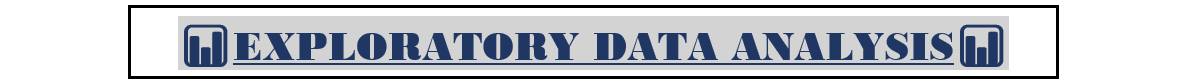

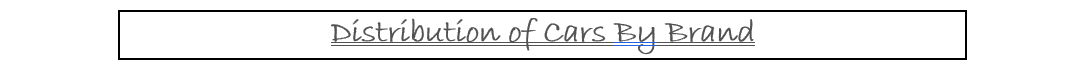

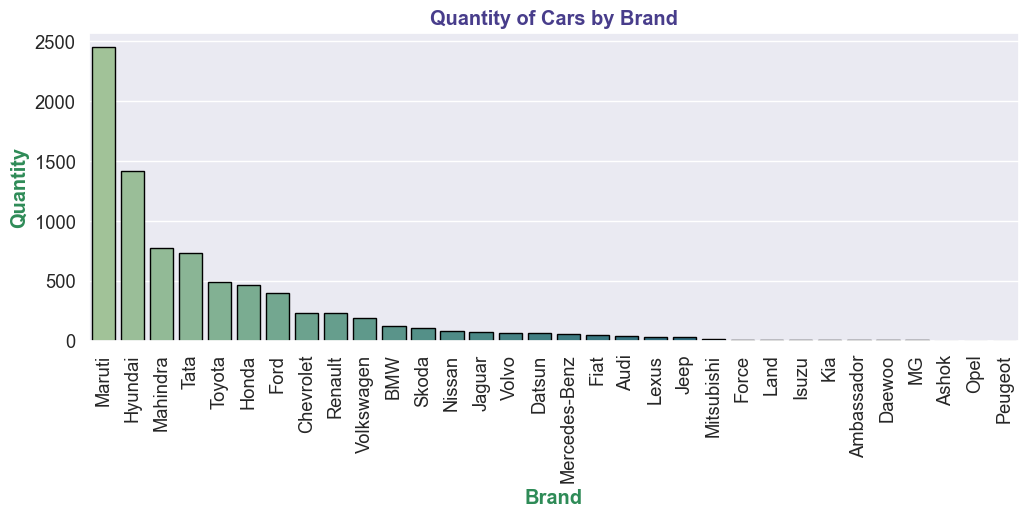

In [122]:
brand = df["Brand"].value_counts().reset_index()  

plt.figure(figsize=(12,4))
sns.barplot(data = brand, x = "Brand", y = "count",palette="crest",edgecolor = "black")
plt.xticks(rotation=90)
plt.title("Quantity of Cars by Brand",fontweight="bold",color="darkslateblue")
plt.xlabel("Brand",fontweight="bold",color="seagreen")
plt.ylabel("Quantity",fontweight="bold",color="seagreen")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue> 📝 Insights: </font></h3>


* Maruti is the most popular car brand with over 2,400 cars, leading by a significant margin, showcasing its dominance in the market.
* Hyundai follows as the second most relevant  brand with about 1,500 car, albeit with a noticeably lower count than Maruti.
* Mahindra and TaTa, occupy third and fourth place, with around 800 cars each, reflecting their strong presence in the automotive space.             
* Brands like Toyota, Honda, and Ford form the mid-tier, contributing moderately to the dataset.                         
* Premium and niche brands like BMW, Mercedes-Benz, and Volvo have relatively smaller counts, which aligns with their typically smaller market
segments.      
* Some brands, such as Peugeot and Opel, have minimal representation, suggesting either limited availability or less popularity.

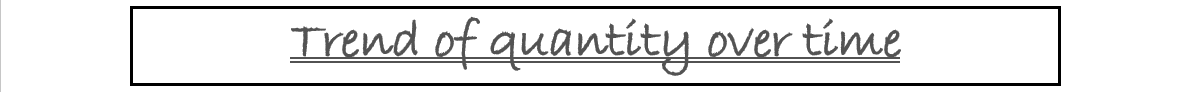

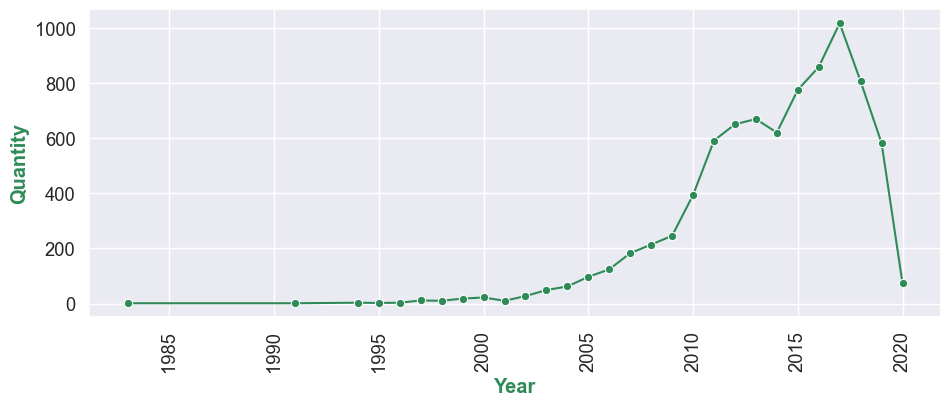

In [74]:
x = df["year"].value_counts().reset_index()
plt.figure(figsize=(11,4))
sns.lineplot(data= x ,x ="year",y="count", marker = "o",color="seagreen")

plt.xlabel("Year",fontweight="bold",color="seagreen")
plt.ylabel("Quantity",fontweight="bold",color="seagreen")
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue> 📝 Insights: </font></h3>

* Time Series Analysis: The plot represents the trend of car sales over the years.
* There is a steady increase in the quantity over the years, with a sharp spike around 2016.
* There is a slow growth from 1985 to 2000, followed by a more rapid increase from 2000 to 2016.
* From 1985 to 2000, the quantity remains minimal, suggesting little activity or relevance in the earlier years.
* After 2016, there is a steep decline in quantity.

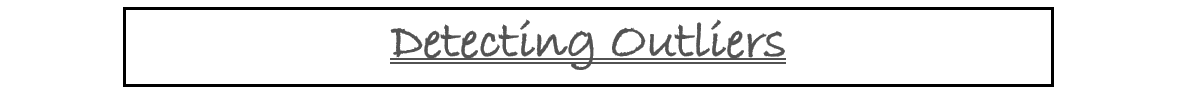

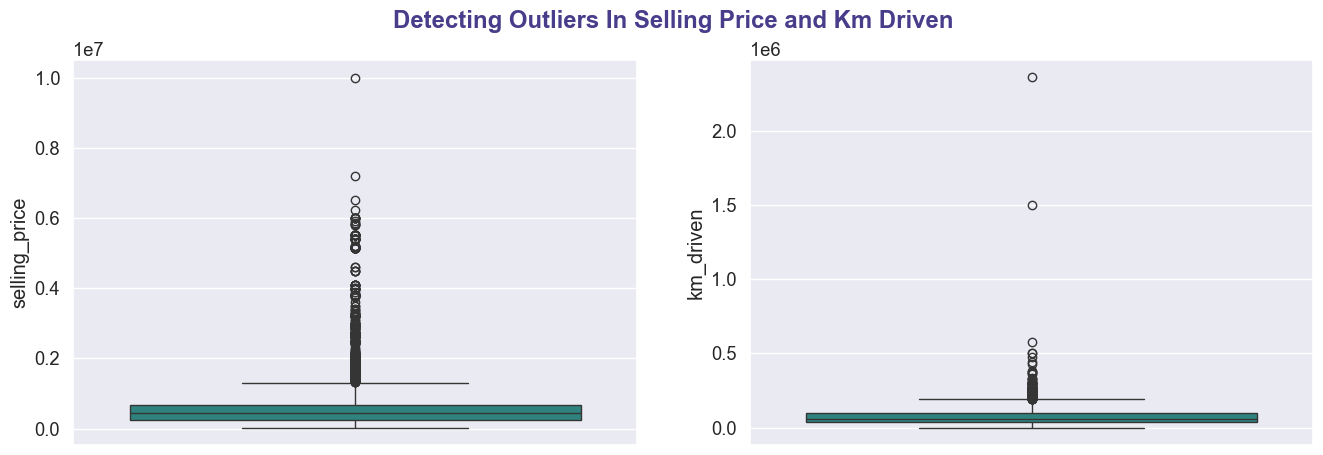

In [75]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df["selling_price"], palette="viridis")

plt.subplot(1,2,2)
sns.boxplot(df["km_driven"], palette="viridis")
plt.suptitle("Detecting Outliers In Selling Price and Km Driven", color="darkslateblue", fontweight="bold")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* Outlier is an anomaly in data (meaning extremely high or extremely low values in a data set that can throw off stats).
* There is a car with extremly high selling price which can be considered as an extreme outlier, so for better analysis we can simply remove that data point from the dataset, known as trimming.
* Similary, in the kilometer driven by the car, there are two such extreme outliers, so we will drop them as well for better performance of our machine learning model.

### Dropping Outliers

In [76]:
df[df["selling_price"]==10000000]

year  selling_price  km_driven    fuel seller_type transmission  \
170  2017       10000000      30000  Petrol  Individual    Automatic   

           owner  engine  max_power  seats  Brand                    Model  \
170  First Owner  1969.0   400000.0    4.0  Volvo  XC90 T8 Excellence BSIV   

     Mileage  Unit     NM     RPM  
170     42.0  kmpl  640.0  1740.0

In [77]:
df.drop(170,axis=0,inplace=True)

In [78]:
df[df["km_driven"]==2360457]

year  selling_price  km_driven    fuel seller_type transmission  \
3486  2007         550000    2360457  Petrol  Individual       Manual   

             owner  engine  max_power  seats    Brand         Model  Mileage  \
3486  Second Owner  1197.0  8010.0803    5.0  Hyundai  i20 Asta 1.2     18.6   

      Unit     NM     RPM  
3486  kmpl  114.7  4000.0

In [79]:
df[df["km_driven"]==1500000]

year  selling_price  km_driven    fuel seller_type transmission  \
1810  2012         500000    1500000  Diesel  Individual       Manual   

            owner  engine  max_power  seats     Brand          Model  Mileage  \
1810  First Owner  2179.0   104000.0    7.0  Mahindra  XUV500 W6 2WD     15.1   

      Unit     NM         RPM  
1810  kmpl  330.0  16002800.0

In [80]:
df.drop(index=[3486,1810],axis=0,inplace=True)

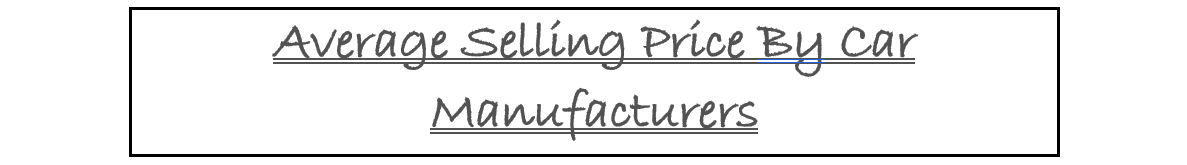

In [81]:
x = df.groupby("Brand")["selling_price"].mean().reset_index().sort_values("selling_price",ascending=False)[0:10]
y = df.groupby("Brand")["selling_price"].mean().reset_index().sort_values("selling_price",ascending=False)[-10:]

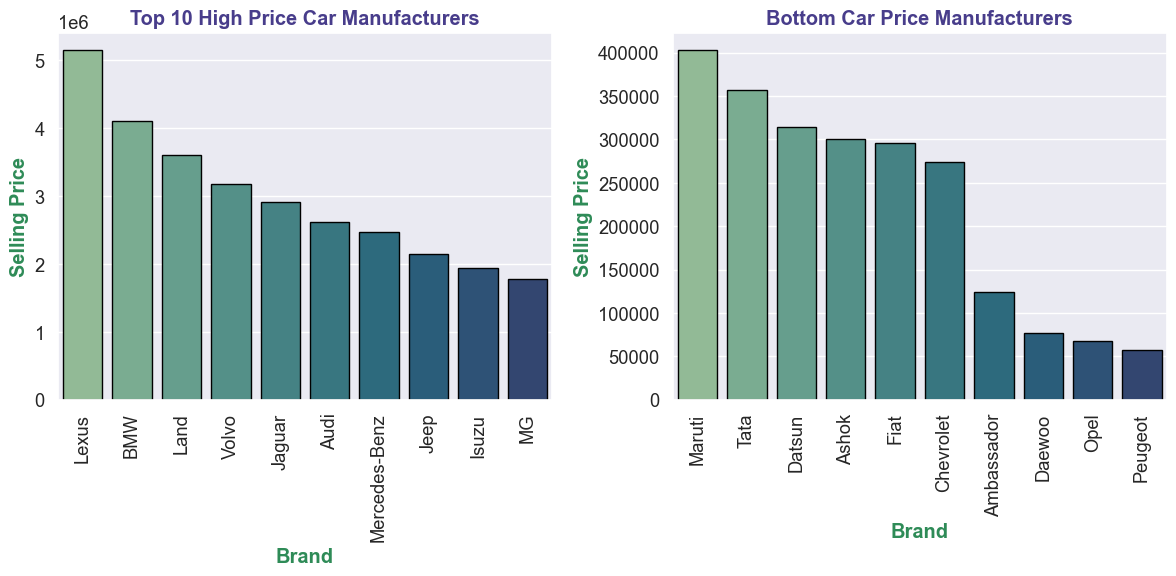

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=x,x ="Brand",y ="selling_price",palette="crest",edgecolor="black")
plt.xticks(rotation=90)
plt.title("Top 10 High Price Car Manufacturers",fontweight="bold",color="darkslateblue")
plt.xlabel("Brand",fontweight="bold",color="seagreen")
plt.ylabel("Selling Price",fontweight="bold",color="seagreen")

plt.subplot(1,2,2)
sns.barplot(data=y,x ="Brand",y ="selling_price",palette="crest",edgecolor="black")
plt.xticks(rotation=90)
plt.title("Bottom Car Price Manufacturers",fontweight="bold",color="darkslateblue")
plt.xlabel("Brand",fontweight="bold",color="seagreen")
plt.ylabel("Selling Price",fontweight="bold",color="seagreen")

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The left graph shows the top 10 car manufacturers with the highest average selling price, indicating a correlation between brand and selling price.
* The top brands with high average selling prices are Lexus, BMW, and Land Rover, followed by Volvo, Jaguar, and Audi.
* Luxury brands like Jaguar, Audi, and Mercedes-Benz dominate the top list, showcasing their strong presence in the premium market.
* The right graph highlights economical and budget-friendly brands with higher production and sales geared toward the mass market.
* It presents the bottom car manufacturers with lower average selling prices, showcasing a contrast in pricing strategies.
* Brands like Maruti and Tata fall under the category of lower price car, reflecting their focus on affordable and mass-market vehicles.

In [83]:
df.sample()

year  selling_price  km_driven    fuel seller_type transmission  \
3017  2013         175000      76000  Diesel  Individual       Manual   

            owner  engine  max_power  seats      Brand           Model  \
3017  First Owner   936.0    5070.06    5.0  Chevrolet  Beat Diesel LT   

      Mileage  Unit     NM     RPM  
3017    25.44  kmpl  150.0  1750.0

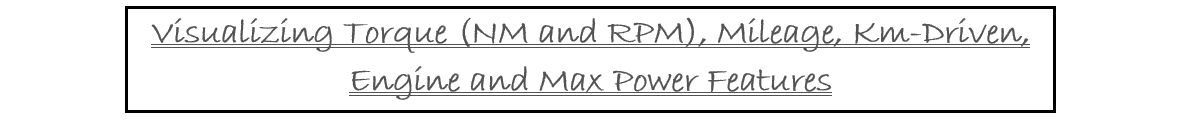

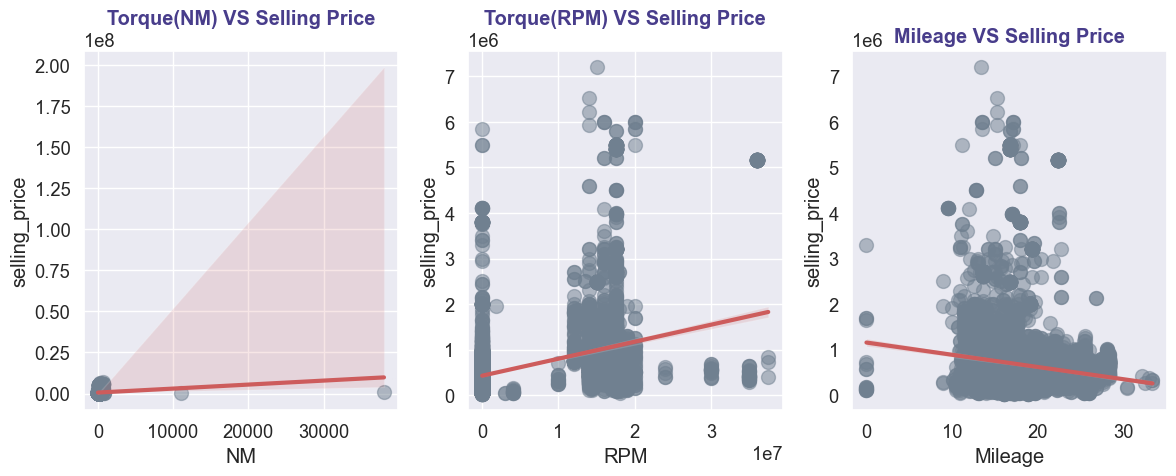

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.regplot(data=df, x = "NM", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Torque(NM) VS Selling Price",fontweight="bold",color="darkslateblue")
plt.subplot(1,3,2)
sns.regplot(data=df, x = "RPM", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Torque(RPM) VS Selling Price",fontweight="bold",color="darkslateblue")

plt.subplot(1,3,3)
sns.regplot(data=df, x = "Mileage", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Mileage VS Selling Price",fontweight="bold",color="darkslateblue")
plt.tight_layout()
plt.grid()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The graph shows a weak positive linear relationship between torque (NM) and selling price, which suggests that as torque increases, the selling price tends to increase slightly, but not significantly.
* Hence, torque (NM) is not a major factor influencing the selling price of cars.
* The torque (RPM) VS selling price also show a moderately strong positive linear relationship suggesting that as torque(RPM) increases, the selling price tends to increase more significantly than in the previous case.
* Hence, torque (RPM) is a more important factor influencing the selling price of cars than torque(NM).
* The mileage and selling price show a negative linear relationship between mileage and selling price, suggesting that as mileage increases, the selling price tends to decrease.
* This is expected as cars with higher mileage tend to be older and have experienced more wear and tear, leading to a lower resale value.

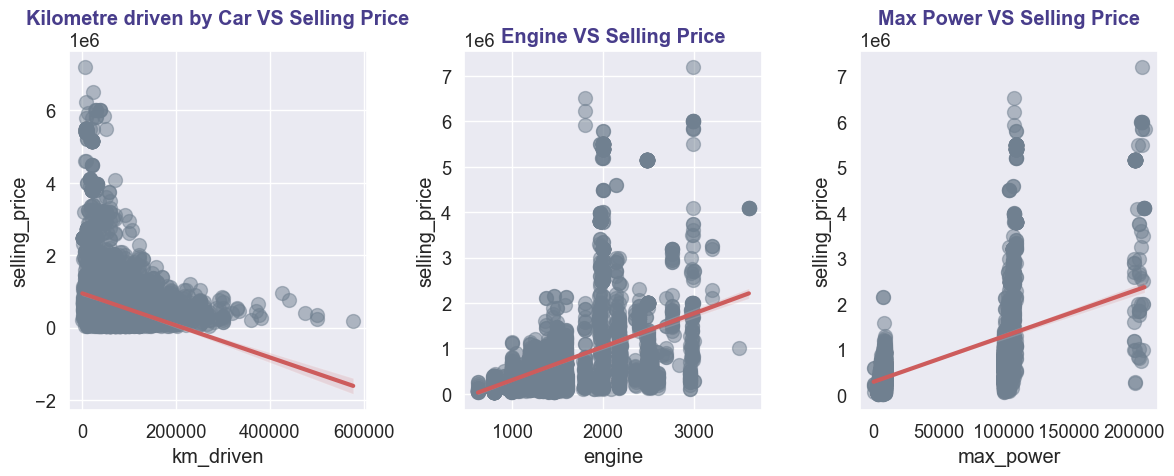

In [85]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.regplot(data=df, x = "km_driven", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Kilometre driven by Car VS Selling Price",fontweight="bold",color="darkslateblue")

plt.subplot(1,3,2)
sns.regplot(data=df, x = "engine", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Engine VS Selling Price",fontweight="bold",color="darkslateblue")

plt.subplot(1,3,3)
sns.regplot(data=df, x = "max_power", y = "selling_price",color="slategrey",scatter_kws={"s":100, "alpha":0.5},line_kws={"color":"indianred","lw":3})
plt.title("Max Power VS Selling Price",fontweight="bold",color="darkslateblue")
plt.tight_layout()
plt.grid()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* There is a **negative correlation** between kilometers driven and selling price. As the number of kilometers driven increases, the selling price tends to decrease. This makes sense as cars with higher mileage are typically less desirable and therefore have a lower selling price.
* There is a **positive correlation** between engine size and selling price. This means that cars with larger engines generally sell for higher prices. This is because larger engines often mean more horsepower and better performance, which are features that buyers are willing to pay more for.
* There is a **positive correlation** between maximum power and selling price. This is similar to the relationship between engine size and selling price, as higher power output is often associated with higher performance and desirability.
* The scatter plots are overlaid with a regression line, which provides a visual representation of the linear relationship between the variables.
The size and transparency of the dots in the scatter plots can be used to represent additional data points.

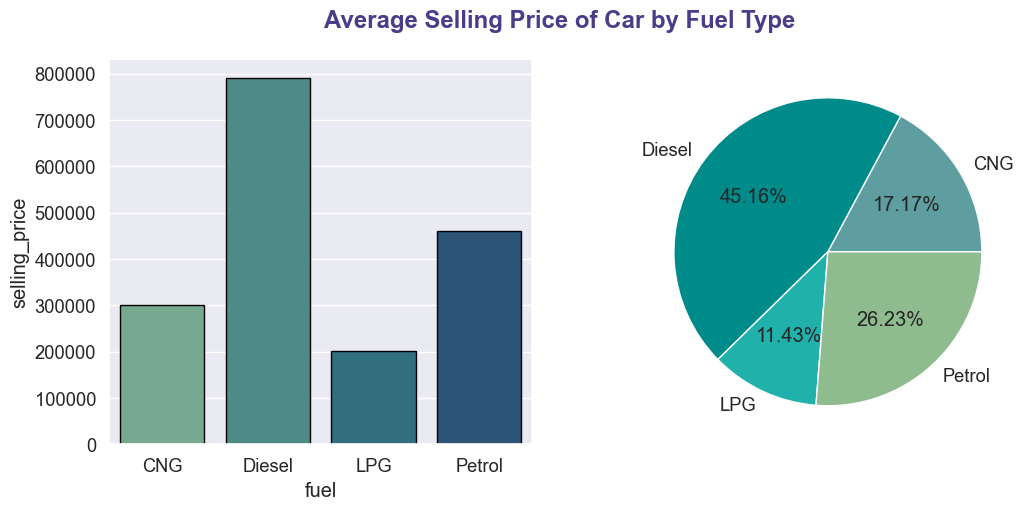

In [86]:
x = df.groupby("fuel")["selling_price"].mean().reset_index()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data = x, x = "fuel", y = "selling_price",palette="crest",edgecolor="black")

plt.subplot(1,2,2)
plt.pie(x["selling_price"],labels=x["fuel"],autopct="%0.2f%%",colors=["cadetblue","darkcyan","lightseagreen","darkseagreen"])
plt.suptitle("Average Selling Price of Car by Fuel Type",fontweight="bold",color="Darkslateblue")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* Diesel cars have the highest average selling price whereas CNG cars have the lowest average selling price.
* The pie chart shows the proportion of cars in the dataset that use each fuel type. Diesel cars dominate, representing 45.16% of the total. CNG cars represent the second-largest proportion, followed by petrol and LPG.
* Hence, it can be interpreted that Diesel cars are highly valued suggesting that they are still in demand, possibly due to factors like fuel efficiency or perceived durability while CNG cars are more budget-friendly and more affordable option for consumers.

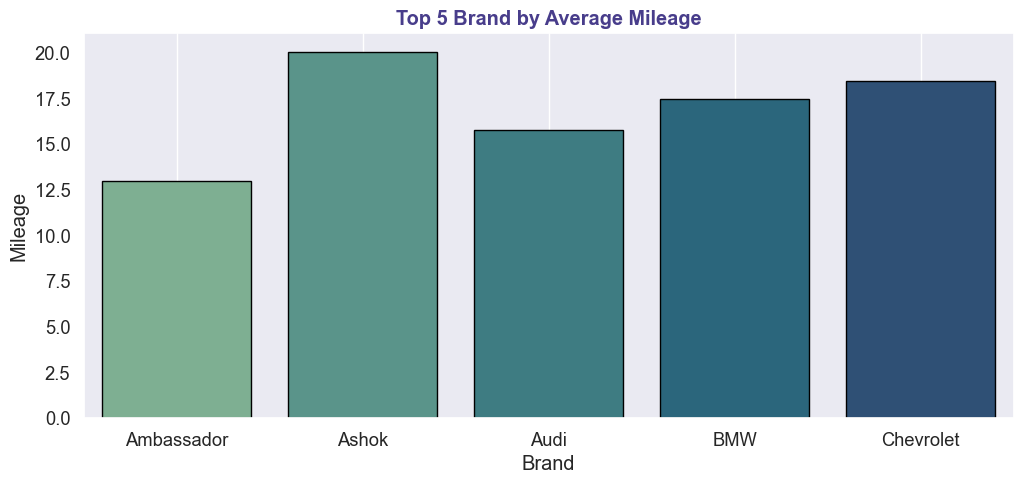

In [87]:
x = df.groupby("Brand")
y = x["Mileage"].mean().head().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=y,x= "Brand",y="Mileage",palette="crest",edgecolor="black")
plt.title("Top 5 Brand by Average Mileage",fontweight="bold",color="darkslateblue")
plt.grid()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* Brand significantly influences a car's average mileage. Ashok and Chevrolet are associated with higher mileage, suggesting potential efficiency or durability. 
* Ambassador has the lowest mileage, potentially indicating older models or less efficient engines.

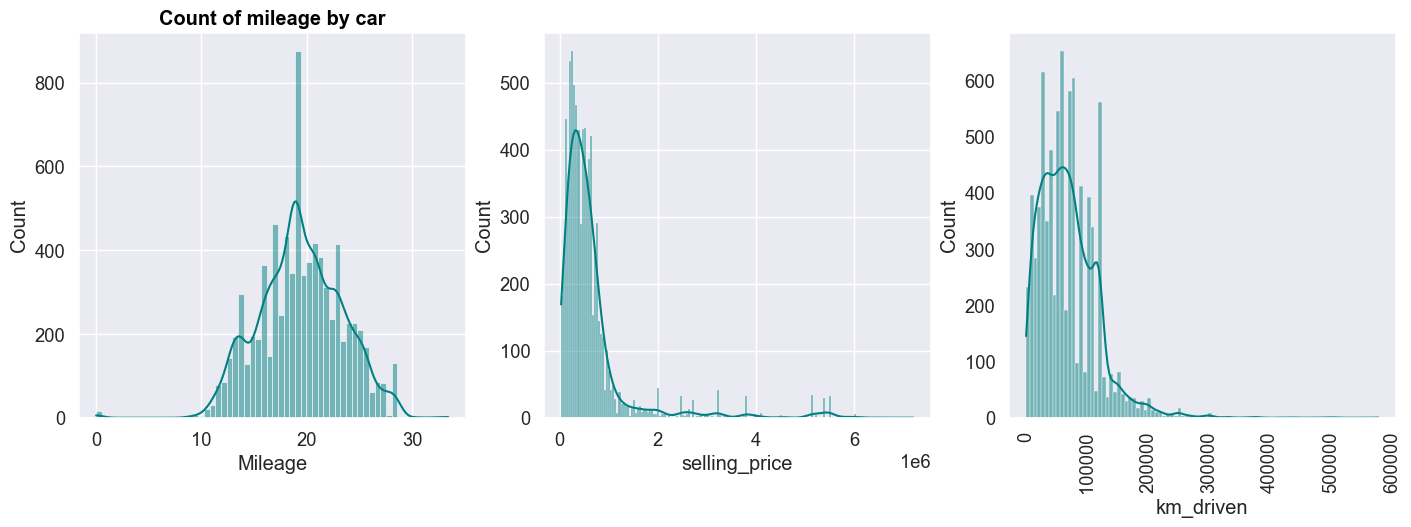

In [89]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = "Mileage", kde = True, color = "teal")
plt.title("Count of mileage by car",fontweight="bold",color="Black")

plt.subplot(1,3,2)
sns.histplot(data=df, x = "selling_price", kde=True, color="teal")

plt.subplot(1,3,3)
sns.histplot(data=df, x = "km_driven", kde=True, color="teal")
plt.xticks(rotation=90)

plt.grid()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

**Mileage :**
* The distribution is skewed towards the right. This means that there are more cars with lower mileage compared to those with higher mileage.
* The peak around 20 suggests that the most common mileage range for cars in this dataset is approximately 20.
* There are a few outliers with very high mileage, indicating a presence of older or heavily used vehicles.                                 

**Selling Price :**            
* The distribution is heavily skewed towards the right, indicating a large number of cars with lower selling prices, while a small number of cars have very high prices.
* The peak is concentrated around 0, implying that the majority of the cars in this dataset are sold at a lower price.
* There are some outliers with a very high selling price. These could be luxury or rare cars.

**Kilometers Driven :**
* Similar to the other variables, this distribution is skewed towards the right, signifying a greater number of cars with lower kilometers driven, and a smaller number with high kilometers driven.
* The peak is around 100,000 kilometers driven. This suggests that many cars in this dataset have been driven around this average distance.
* There are some outliers with very high km driven, indicating potentially older cars or those used for commercial purposes.

Overall, the skewed distribution of all three variables (mileage, selling price, km_driven) suggests a general trend in the car market, where the majority of vehicles tend to be lower priced and driven fewer kilometers.


In [133]:
x = df.groupby("Model")["selling_price"].sum().reset_index().sort_values("selling_price",ascending=False)[0:10]

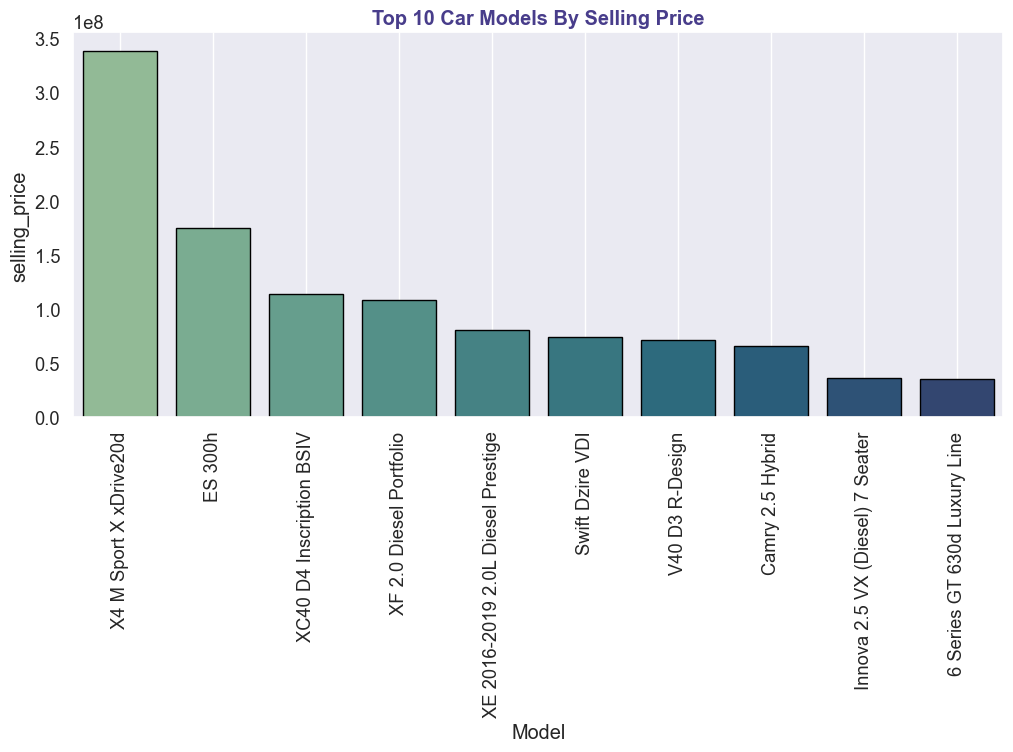

In [137]:
plt.figure(figsize=(12,5))
sns.barplot(data=x, x = "Model", y = "selling_price",palette="crest",edgecolor="black")
plt.title("Top 10 Car Models By Selling Price",color="darkslateblue", fontweight="bold")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* X4 M Sport X xDrive20d is the top-selling car model with a selling price exceeding 300 million.
* ES 300h comes in second with a selling price close to 180 million.
* XC40 D4 Inscription BSIV and XF 2.0 Diesel Portfolio follow closely behind.
* The remaining models have significantly lower selling prices, suggesting a significant drop in popularity or price point.
* The top 4 models are all premium brands, indicating a preference for luxury vehicles.
* The bottom 6 models include a mix of brands and models, suggesting a more diverse customer base with varying needs and budgets.


Analyze the specific features of the top-selling models to identify key factors driving customer preference.
Investigate the reasons for the lower sales of the remaining models to understand market trends and opportunities.
Consider the impact of market factors such as economic conditions, fuel prices, and availability of alternative transportation options.
Develop targeted marketing strategies based on the insights gained from the analysis to increase sales and appeal to specific customer segments.

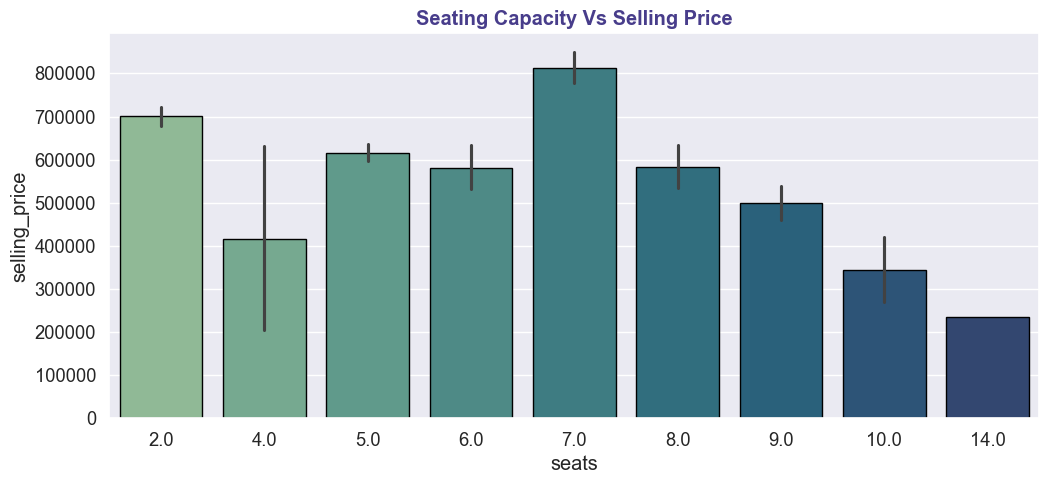

In [90]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x = "seats", y = "selling_price",palette="crest",edgecolor="black")
plt.title("Seating Capacity Vs Selling Price",color="darkslateblue",fontweight="bold")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3> 

* The graph showcases a general positive correlation between the seating capacity and the selling price. As the number of seats increases, the selling price tends to rise as well. This indicates that larger seating capacities are associated with higher prices. This could be attributed to factors like:
* Increased Space: Larger seating capacity implies more space and potentially better comfort for passengers/attendees.
* Higher Demand: Items with greater seating capacity might be in higher demand for larger groups or events.
* Enhanced Features: Higher -priced items with more seating may include additional features or amenities to justify the cost.

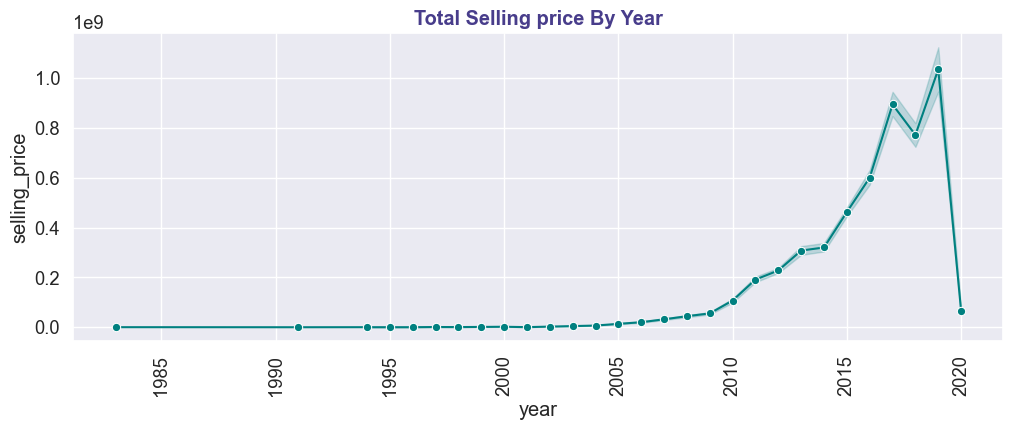

In [91]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df,x = "year", y = "selling_price",estimator="sum",color="teal",marker = "o")
plt.xticks(rotation=90)
plt.title("Total Selling price By Year",fontweight="bold",color="darkslateblue")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The selling price remained relatively flat from 1985 to 2005, suggesting limited growth or perhaps a period of stability in the market.
* From 2010 onwards, we observe a marked increase in the total selling price. This could indicate several factors:
* Increased Demand : A surge in demand for the product or service led to a rise in price.
* Inflation : General inflation could have contributed to the price increase.
* Market Changes: Shifts in the market dynamics or changes in production costs might have influenced the price upward.
* The graph shows slight fluctuations, especially in the later years. These fluctuations could be due to seasonal variations, economic shifts, or changes in the product's availability.
* The total selling price reaches a peak in 2020 before dropping significantly. Possible causes for this sharp drop needs could be:
Economic Downturn: A recession or economic instability might have impacted sales due to lockdown.

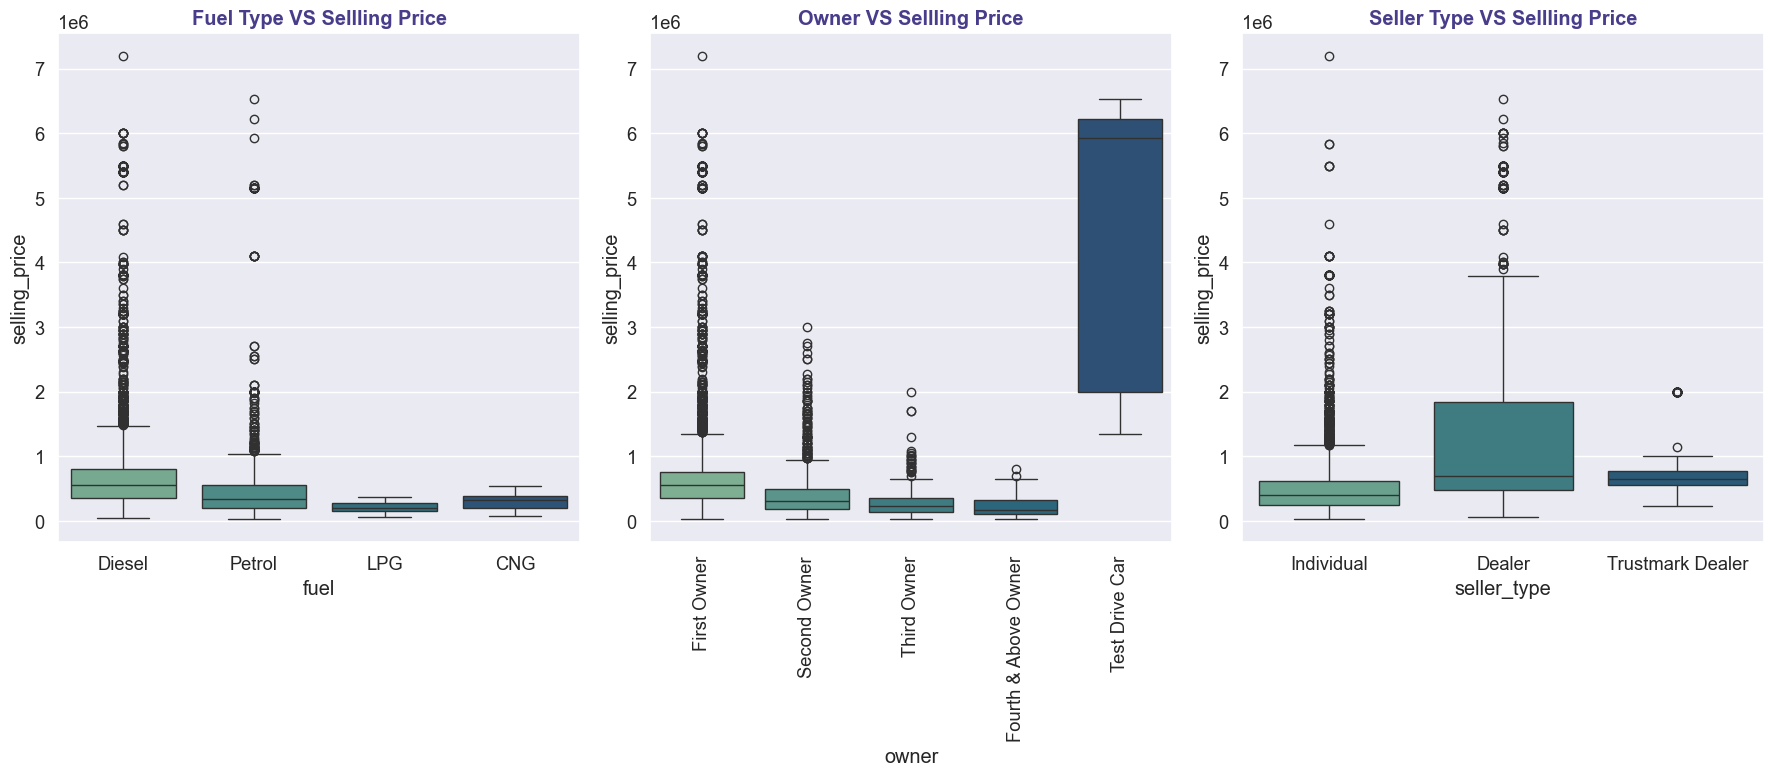

In [93]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(data=df, x ="fuel", y="selling_price",palette="crest")
plt.title("Fuel Type VS Sellling Price",fontweight="bold",color="darkslateblue")

plt.subplot(1,3,2)
sns.boxplot(data=df, x ="owner", y="selling_price",palette="crest")
plt.title("Owner VS Sellling Price",fontweight="bold",color="darkslateblue")
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(data=df, x ="seller_type", y="selling_price",palette="crest")
plt.title("Seller Type VS Sellling Price",fontweight="bold",color="darkslateblue")

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The selling price of cars varies significantly based on the type of fuel used, the number of previous owners, and the type of seller.
* Cars with diesel fuel and Test Drive status have a higher median selling price.
* Individual sellers generally sell cars at a lower price compared to dealers.
* There are outliers in all the categories indicating some cars with extremely high selling prices.

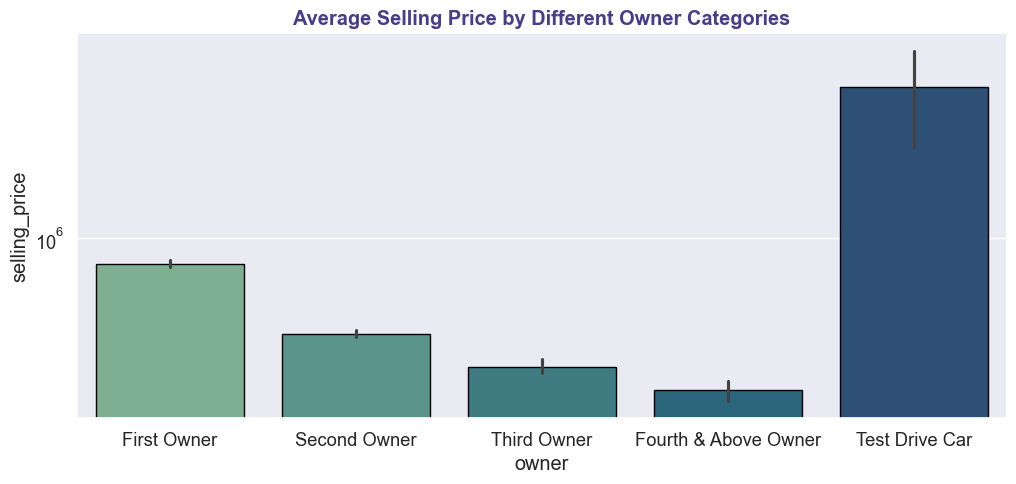

In [94]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x = "owner", y= "selling_price",palette="crest",edgecolor="black")
plt.title("Average Selling Price by Different Owner Categories",fontweight="bold",color="darkslateblue")
plt.yscale(value="log")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The chart clearly indicates that test drive cars command the highest average selling price compared to other categories, suggesting that they are perceived as having higher value, likely due to lower mileage and pristine condition.
* The average selling price for first owner cars is also considerably high, implying that vehicles with a single owner history are generally considered desirable and fetch a premium price.
* The average price drops gradually as the number of previous owners increases, reaching the lowest for cars with "Fourth & Above Owners." This trend highlights the potential depreciation associated with a longer ownership history.

This analysis indicates a strong relationship between ownership history and selling price. While test drive cars and first-owner vehicles attract premium prices, the value declines progressively with multiple owners. This understanding can inform decisions for both buyers and sellers in the automotive market.

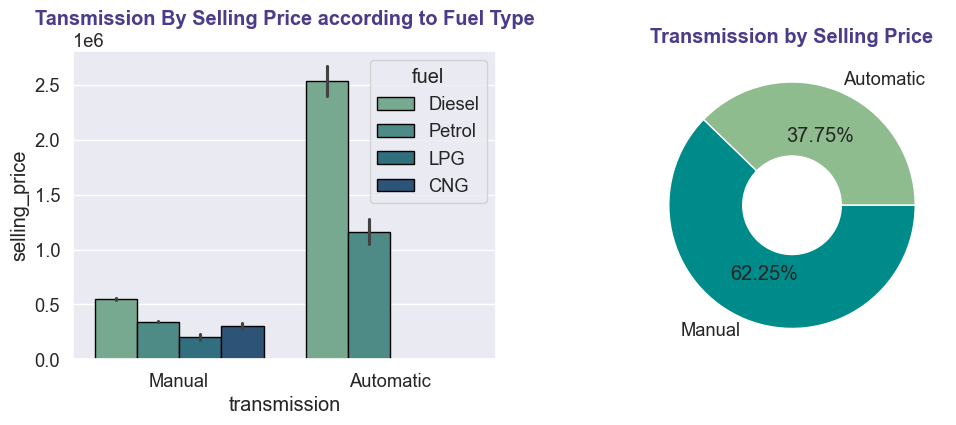

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=df, x = "transmission", y = "selling_price",hue ="fuel", palette="crest",edgecolor="black")
plt.title("Tansmission By Selling Price according to Fuel Type",fontweight="bold",color="darkslateblue") 

plt.subplot(1,2,2)
x = df.groupby("transmission")["selling_price"].sum().reset_index()
plt.pie(x["selling_price"], labels=x["transmission"],autopct = "%0.2f%%",colors=["darkseagreen","darkcyan"])
plt.pie([1],colors="w",radius=0.4)
plt.title("Transmission by Selling Price",fontweight="bold",color="darkslateblue")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The average selling price of vehicles with Automatic transmission is significantly higher than those with Manual transmission, suggesting it as a premium feature that commands a higher price in the market.
* Also, the selling price for Diesel and Petrol vehicles are higher than those with LPG or CNG fuel, reflecting the higher demand and perceived value of Diesel and Petrol vehicles, possibly due to their better performance or availability.
* The pie chart showcases that 62.25% of the vehicles have a Manual transmission while 37.75% have Automatic transmission.

The Automatic transmission and Diesel/Petrol fuel types are associated with higher selling prices. This could be attributed to factors like increased convenience, performance, and market demand. The data also highlights a clear preference for Manual transmission in the market.

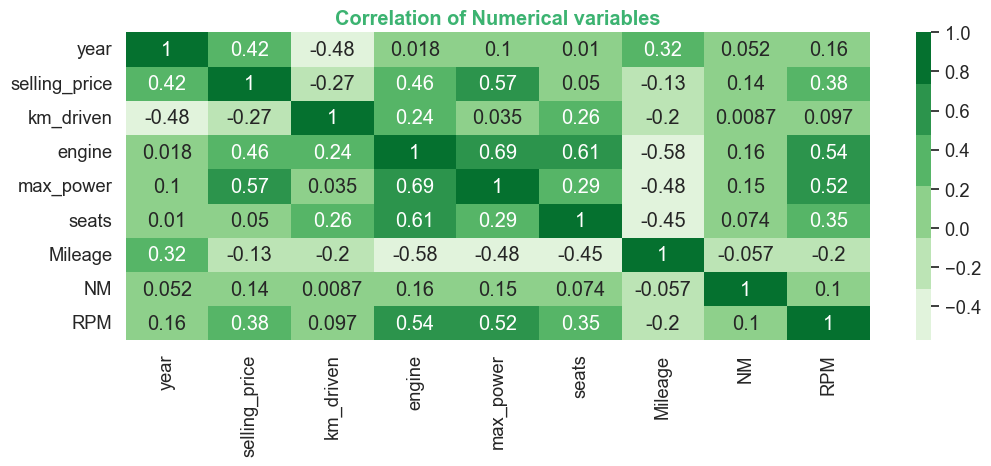

In [96]:
df_num = df.select_dtypes(include=["float","int"])
plt.figure(figsize=(12,4))
colormap = sns.color_palette("Greens") 
sns.heatmap(df_num.corr(),annot=True,cmap=colormap)
plt.title("Correlation of Numerical variables",fontweight="bold",color="mediumseagreen")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* The strong positive correlation between selling price and features like max power and engine size suggests that these factors could be crucial in a pricing model for cars.
* The negative correlation between selling price and km driven highlights the importance of mileage in car pricing. This could be factored into a pricing model to adjust prices based on the vehicle's age and usage.
* Also, a weak negative correlation can be observed between the engine size and mileage indicating that larger engines might consume more fuel, leading to lower mileage.

<Figure size 1200x500 with 0 Axes>

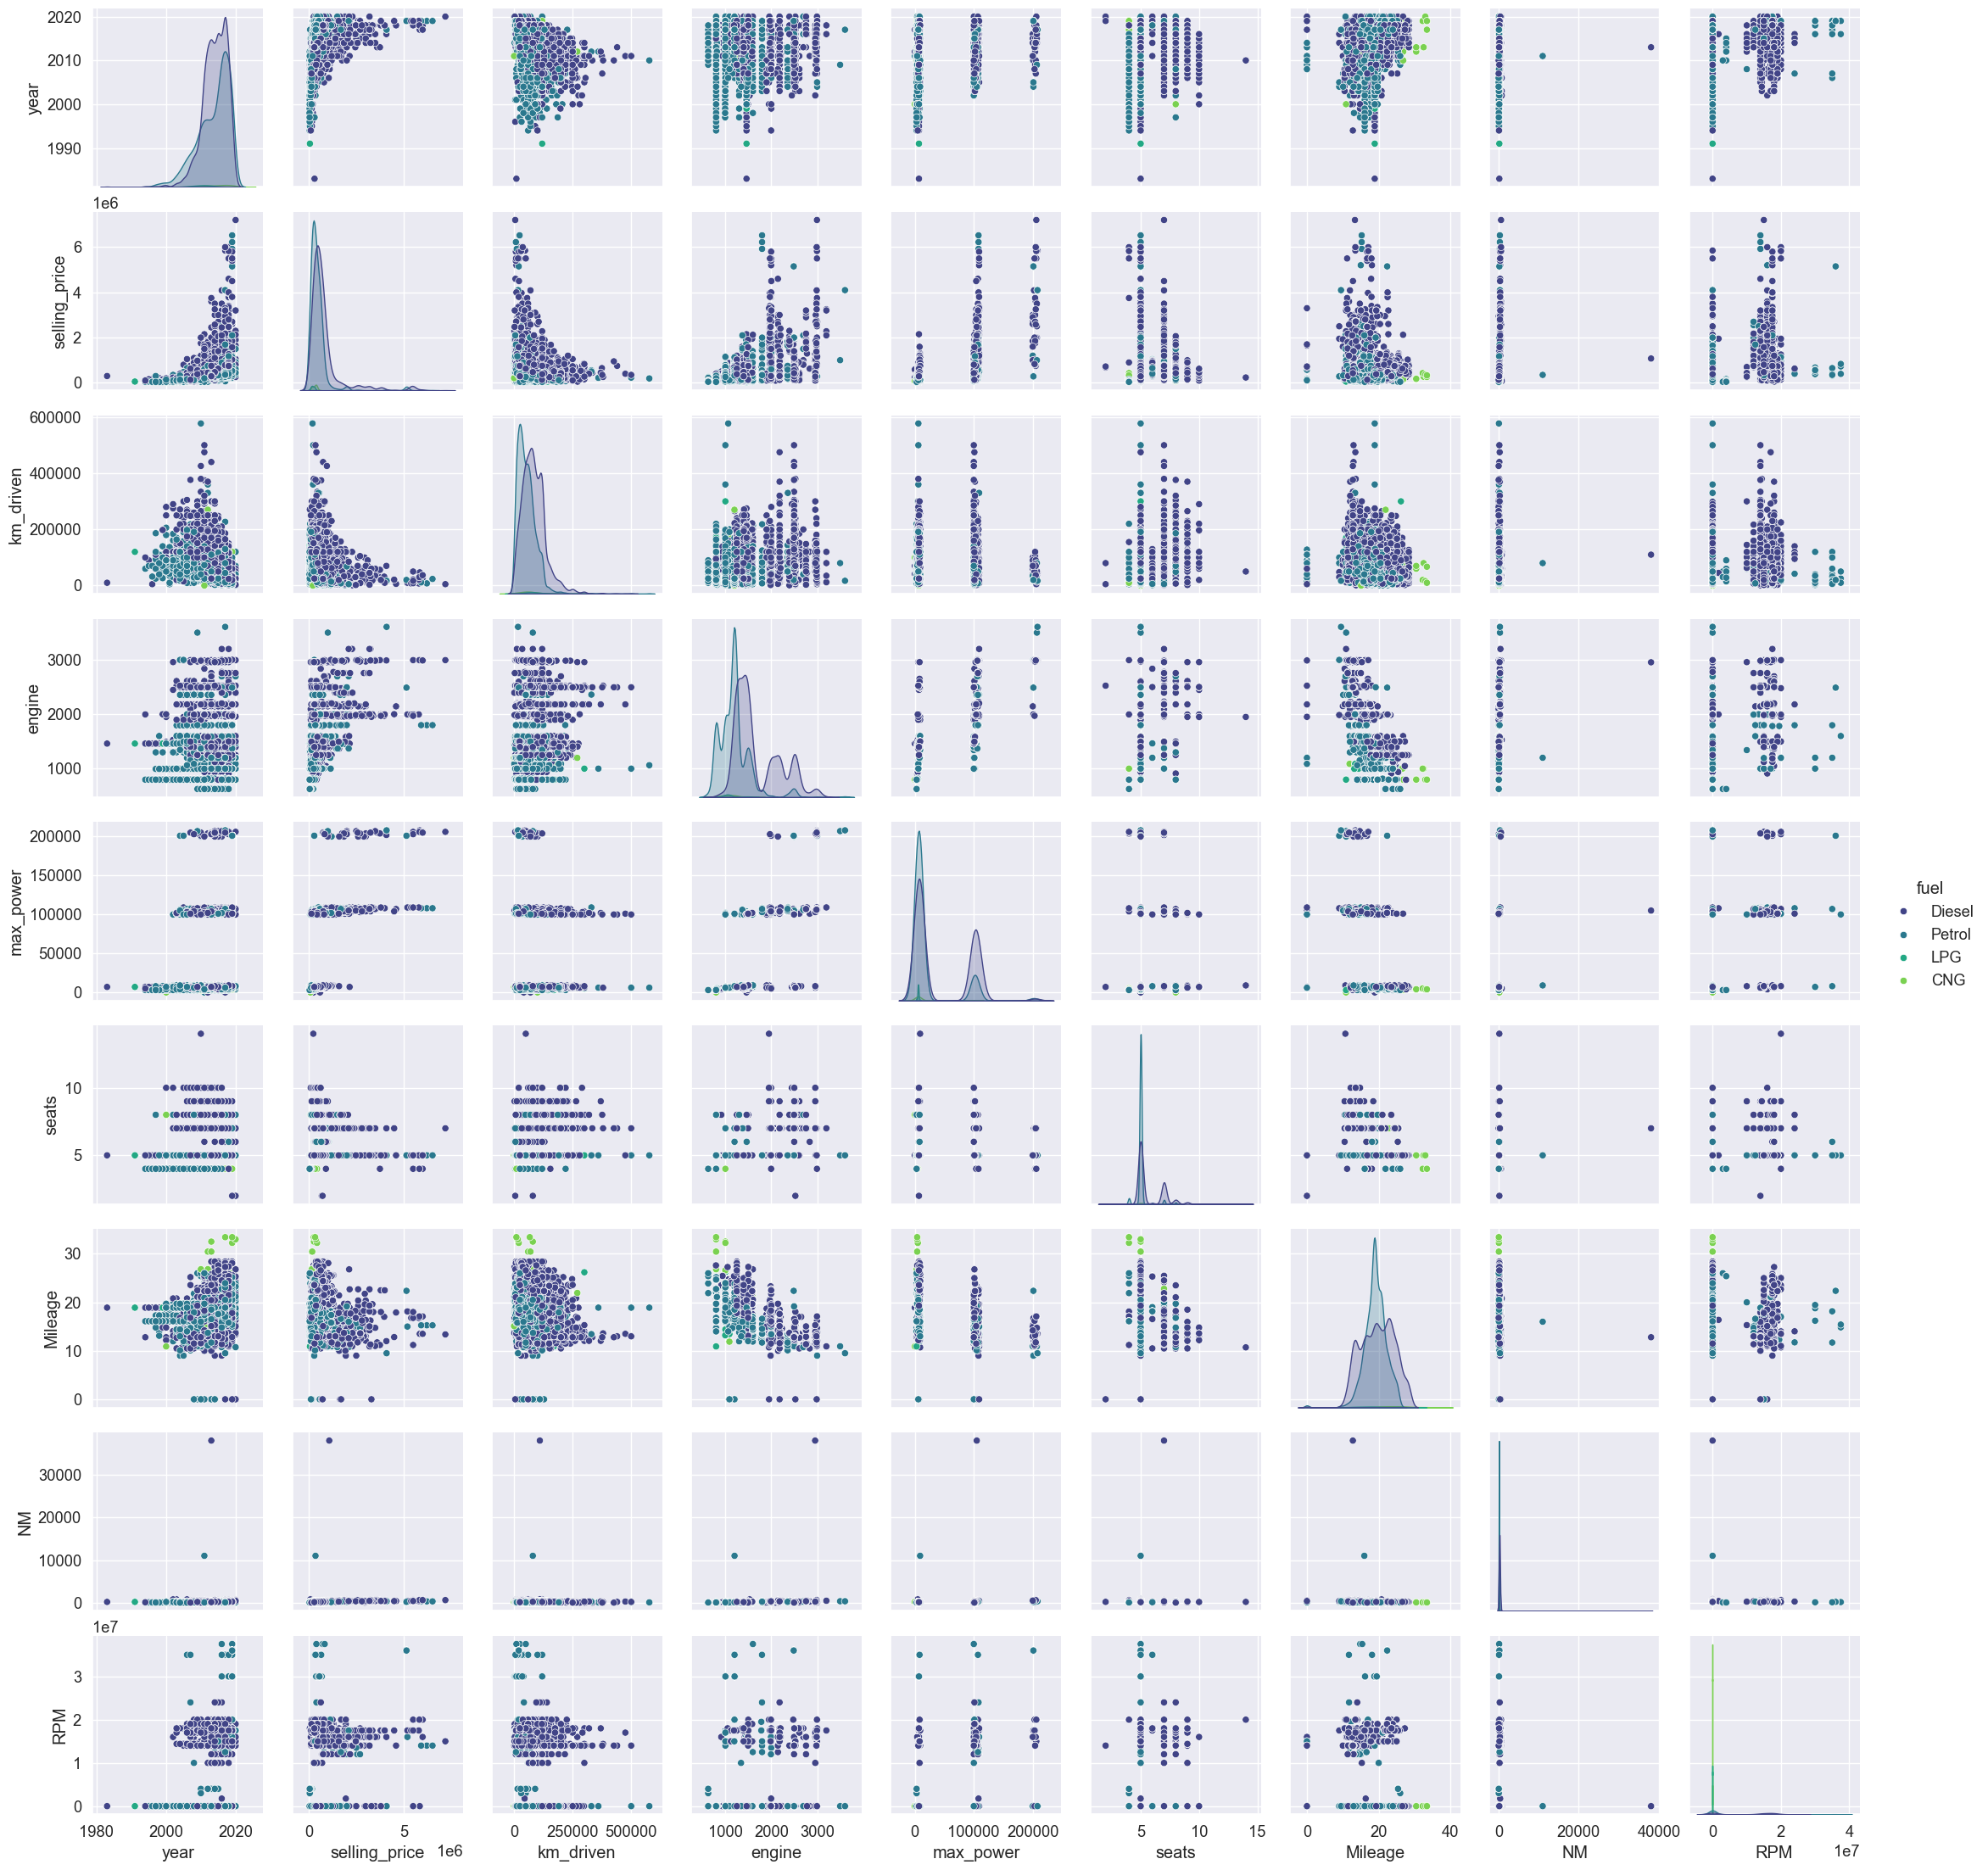

In [97]:
plt.figure(figsize=(12,5))
sns.pairplot(df,hue="fuel",palette="viridis")
plt.show()

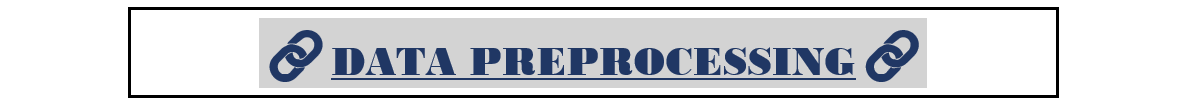

In [98]:
df2 = df.copy()

In [99]:
df2.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine    max_power  seats    Brand                   Model  \
0   First Owner  1248.0    7040.0000    5.0   Maruti         Swift Dzire VDI   
1  Second Owner  1498.0  100030.0502    5.0    Skoda  Rapid 1.5 TDI Ambition   
2   Third Owner  1497.0    7080.0000    5.0    Honda      City 2017-2020 EXi   
3   First Owner  1396.0    9000.0000    5.0  Hyundai       i20 Sportz Diesel   
4   First Owner  1298.0    8080.0200    5.0   Maruti         Swift VXI BSIII   

   Mileage  Unit     NM         RPM  
0    23.40  kmpl  190.0      2000.0  
1    21.14  kmpl  250.0  15002500.0  
2    17.70  kmpl   12.7      2700.0  
3    23.00  kmpl   22.4  17502750.0  
4    16.10  kmpl   11.5      4500.0

In [100]:
df2.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
Brand             object
Model             object
Mileage          float64
Unit              object
NM               float64
RPM              float64
dtype: object

### • Encoding Categorical Features

In [101]:
ln = LabelEncoder()

In [102]:
for i in df2:
    if df2[i].dtypes=="object":
     df2[i] = ln.fit_transform(df2[i])

In [103]:
df2.head()

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   engine    max_power  seats  Brand  Model  Mileage  Unit     NM         RPM  
0  1248.0    7040.0000    5.0     20   1562    23.40     1  190.0      2000.0  
1  1498.0  100030.0502    5.0     27   1274    21.14     1  250.0  15002500.0  
2  1497.0    7080.0000    5.0     10    331    17.70     1   12.7      2700.0  
3  1396.0    9000.0000    5.0     11   2054    23.00     1   22.4  17502750.0  
4  1298.0    8080.0200    5.0     20   1604    16.10     1   11.5      4500.0

In [104]:
df2.dtypes.reset_index().T

0              1          2      3            4             5   \
index   year  selling_price  km_driven   fuel  seller_type  transmission   
0      int64          int64      int64  int32        int32         int32   

          6        7          8        9      10     11       12     13  \
index  owner   engine  max_power    seats  Brand  Model  Mileage   Unit   
0      int32  float64    float64  float64  int32  int32  float64  int32   

            14       15  
index       NM      RPM  
0      float64  float64

### • Dividing Features and Target for Model Training

In [105]:
x = df2.drop(columns=["selling_price"],axis=1)

In [106]:
y = df2["selling_price"]

### • Scaling Features using Standard Scaler
* The standard Scaling is a feature scaling technique in machine learning that standardizes the features of a dataset.
* It scales the data so that each feature has a mean of zero and a standard deviation of one. This process is also known as z-score normalization.

In [107]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.04830142,  1.58721054, -0.8889656 , ...,  0.10463919,
         0.03399405, -0.68121043],
       [ 0.04830142,  1.05559371, -0.8889656 , ...,  0.10463919,
         0.16811449,  1.15213003],
       [-1.93001766,  1.47254809,  1.10657122, ...,  0.10463919,
        -0.36233186, -0.68112488],
       ...,
       [-1.188148  ,  1.05559371, -0.8889656 , ...,  0.10463919,
         0.03399405, -0.68121043],
       [-0.19898846, -0.92493959, -0.8889656 , ...,  0.10463919,
        -0.07777299,  1.51884701],
       [-0.19898846, -0.92493959, -0.8889656 , ...,  0.10463919,
        -0.07777299,  1.51884701]])

### • Splitting Data for Model Training and Testing

In [108]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

In [109]:
print("Dimension Of x-train data : ",x_train.shape)

Dimension Of x-train data :  (6500, 15)


In [110]:
print("Dimension Of x-test data : ",x_test.shape)

Dimension Of x-test data :  (1625, 15)


In [111]:
print("Dimension Of y-train data : ",y_train.shape)

Dimension Of y-train data :  (6500,)


In [112]:
print("Dimension Of y-test data : ",y_test.shape)

Dimension Of y-test data :  (1625,)


## • Creating A Function For Model Training and Model Evaluation

In [113]:
train = []
test = []
model = [] 
r2_score = []
mae_score = []
mse_score = []
rmse_score = []
mape_score = []

def model_build(x):
    x.fit(x_train,y_train)
    train_ac = x.score(x_train,y_train)
    test_ac = x.score(x_test,y_test)
    pred = x.predict(x_test)
    train.append(train_ac)
    test.append(test_ac)
    model.append(f"{x}")
    print("."*152)
    print(f"Built {x} Machine Learning Algorithm")
    print("."*152)
    print("Accuracy of Train data:",train_ac)
    print("Accuracy of Test data:",test_ac)
    print("."*152)
    
    # Metric Calculations
    MSE = mean_squared_error(y_test,pred)
    MAE = mean_absolute_error(y_test,pred)
    MAPE = mean_absolute_percentage_error(y_test,pred)
    RMSE = root_mean_squared_error(y_test,pred)
    
    #Appending Metric Value
    mae_score.append(MAE)
    mse_score.append(MSE)
    rmse_score.append(RMSE)
    mape_score.append(MAPE)
    
    #Returning Metric Values
    print("Mean Squared Error : ",MSE)
    print("Mean Absolute Error : ",MAE)
    print("Mean Absolute Percentage Error : ",MAPE)
    print("Root Mean Squared Error : ",RMSE)
    
    # Scatter Plot
    x_train_pred = x.predict(x_train)
    x_test_pred = x.predict(x_test)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.scatter(y_train, x_train_pred, color='slategrey', label='Train')
    plt.scatter(y_test, x_test_pred, color='lightcoral', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot', fontweight="bold",color="darkslateblue")
    
    # Residual plot
    plt.subplot(1, 2, 2)
    plt.scatter(x_train_pred, x_train_pred - y_train, color='slategrey', label='Train')
    plt.scatter(x_test_pred, x_test_pred - y_test, color='lightcoral', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot', fontweight="bold", color="darkslateblue")

........................................................................................................................................................
Built LinearRegression() Machine Learning Algorithm
........................................................................................................................................................
Accuracy of Train data: 0.629030008964095
Accuracy of Test data: 0.6153417573569644
........................................................................................................................................................
Mean Squared Error :  216400420497.85776
Mean Absolute Error :  286476.89079214534
Mean Absolute Percentage Error :  0.8487286681586607
Root Mean Squared Error :  465188.58594967454


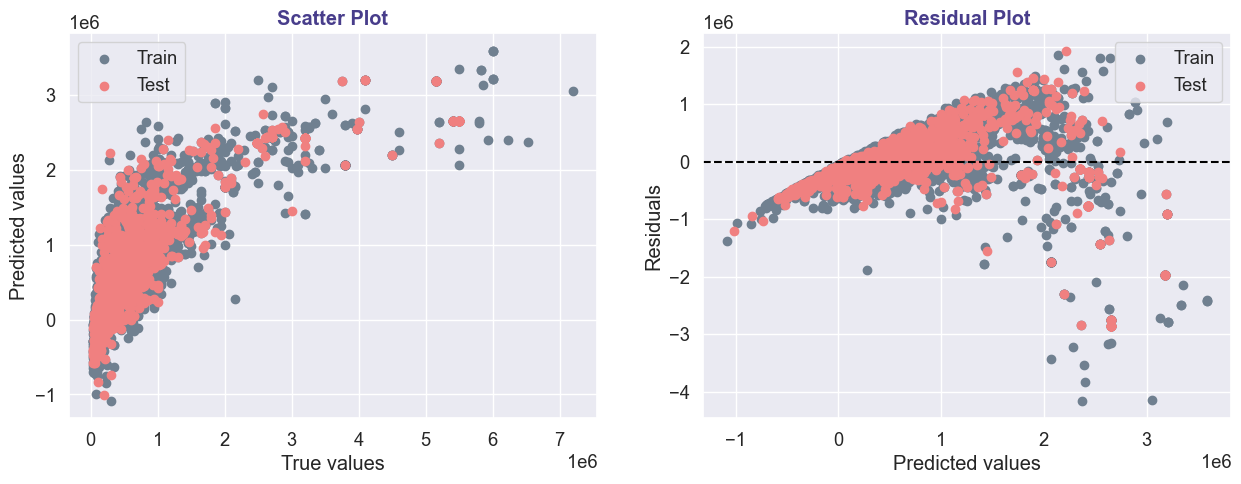

In [114]:
model_build(LinearRegression())

........................................................................................................................................................
Built LogisticRegression() Machine Learning Algorithm
........................................................................................................................................................
Accuracy of Train data: 0.15923076923076923
Accuracy of Test data: 0.11876923076923077
........................................................................................................................................................
Mean Squared Error :  149315284922.56186
Mean Absolute Error :  154117.31384615385
Mean Absolute Percentage Error :  0.33376654937735994
Root Mean Squared Error :  386413.3601760708


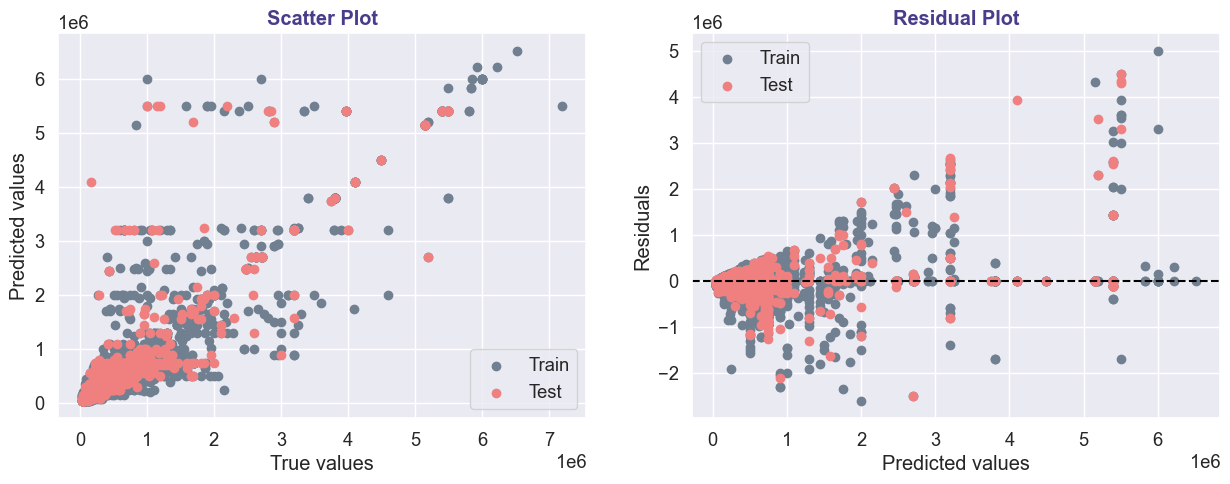

In [115]:
model_build(LogisticRegression())

........................................................................................................................................................
Built KNeighborsRegressor() Machine Learning Algorithm
........................................................................................................................................................
Accuracy of Train data: 0.9533764006913871
Accuracy of Test data: 0.9411109778778094
........................................................................................................................................................
Mean Squared Error :  33129692119.390823
Mean Absolute Error :  90798.63236923076
Mean Absolute Percentage Error :  0.21212759883612647
Root Mean Squared Error :  182015.6370188859


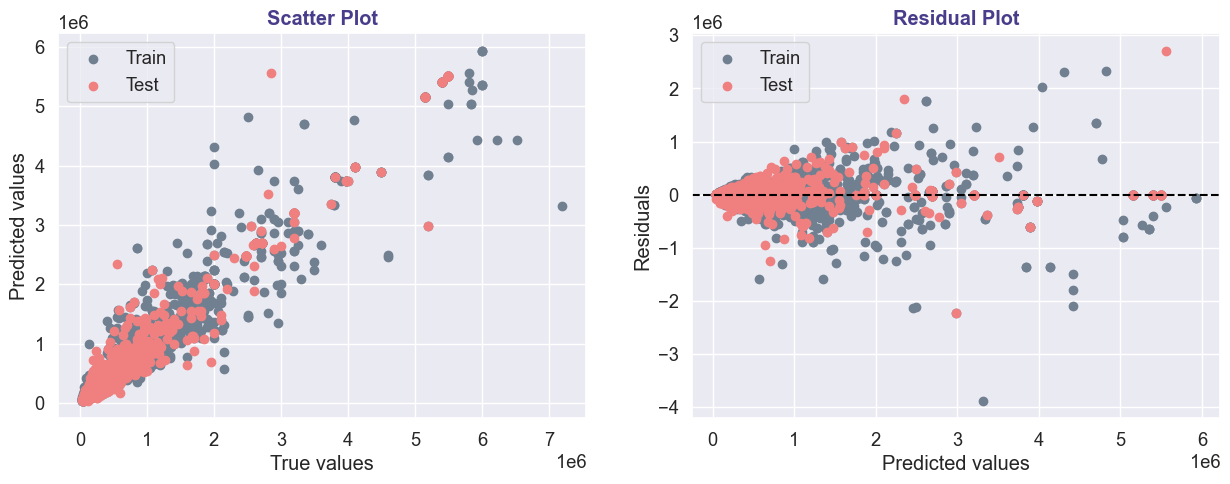

In [116]:
model_build(KNeighborsRegressor())

........................................................................................................................................................
Built DecisionTreeRegressor() Machine Learning Algorithm
........................................................................................................................................................
Accuracy of Train data: 0.9998497162462187
Accuracy of Test data: 0.9517452925548149
........................................................................................................................................................
Mean Squared Error :  27147056333.40531
Mean Absolute Error :  74029.08219217819
Mean Absolute Percentage Error :  0.19268827676977668
Root Mean Squared Error :  164763.6377766809


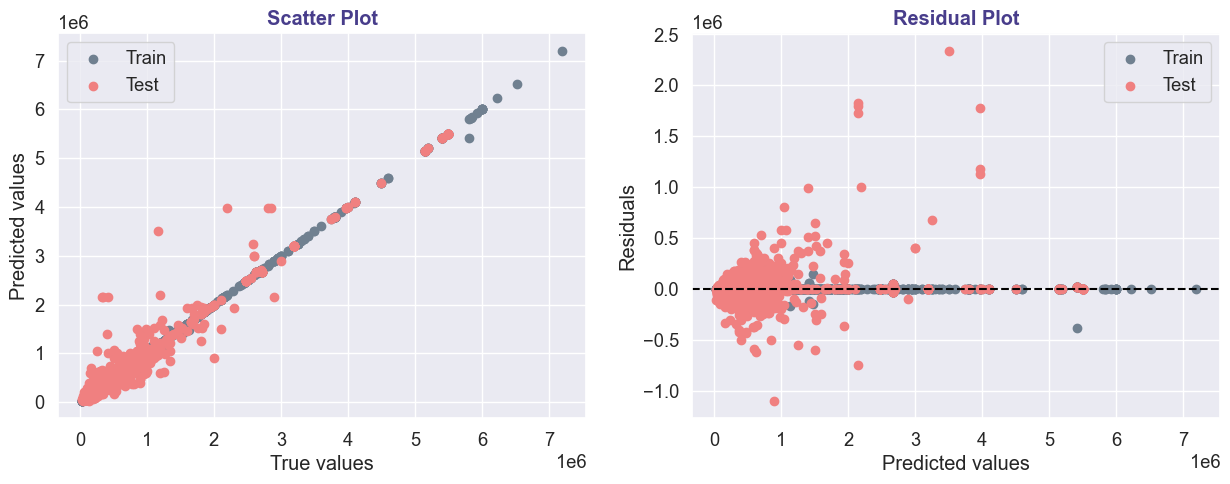

In [117]:
model_build(DecisionTreeRegressor())

........................................................................................................................................................
Built RandomForestRegressor() Machine Learning Algorithm
........................................................................................................................................................
Accuracy of Train data: 0.9957540293933694
Accuracy of Test data: 0.975541479033085
........................................................................................................................................................
Mean Squared Error :  13759835706.69991
Mean Absolute Error :  59656.054488715505
Mean Absolute Percentage Error :  0.1499022440409997
Root Mean Squared Error :  117302.32609245184


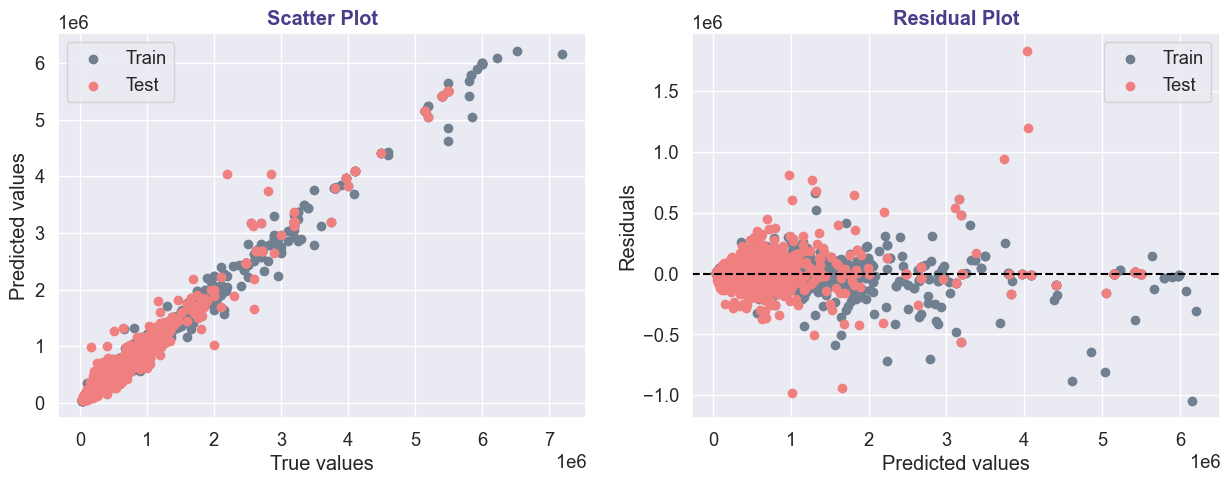

In [118]:
model_build(RandomForestRegressor())

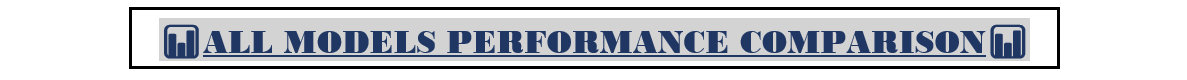

In [119]:
performance = pd.DataFrame({"Model": model,"Train_ac":train,"Test_ac":test,"MAE":mae_score,"MSE":mse_score,"RMSE":rmse_score,"MAPE":mape_score})

In [120]:
performance

Model  Train_ac   Test_ac            MAE           MSE  \
0       LinearRegression()  0.629030  0.615342  286476.890792  2.164004e+11   
1     LogisticRegression()  0.159231  0.118769  154117.313846  1.493153e+11   
2    KNeighborsRegressor()  0.953376  0.941111   90798.632369  3.312969e+10   
3  DecisionTreeRegressor()  0.999850  0.951745   74029.082192  2.714706e+10   
4  RandomForestRegressor()  0.995754  0.975541   59656.054489  1.375984e+10   

            RMSE      MAPE  
0  465188.585950  0.848729  
1  386413.360176  0.333767  
2  182015.637019  0.212128  
3  164763.637777  0.192688  
4  117302.326092  0.149902

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=darkslateblue>📝 Insights:</font></h3>

* In general, tree-based ensemble method namely Random Forest tend to perform well in regression tasks, as shown by its low error metrics. This algorithm is able to capture complex relationships and interactions within the data, resulting in accurate predictions.
* The performance of each machine learning model was evaluated using key metrics such as Train Accuracy, Test Accuracy, MAE, MSE, RMSE, and MAPE. The insights for each model are:
  
* **Linear Regression:**
Train Accuracy: 62.9%, Test Accuracy: 61.5%                                   
High errors (MAE: 286,477, RMSE: 465,188) indicate the model struggled to capture complex relationships in the data.

* **Logistic Regression:**
Train Accuracy: 15.9%, Test Accuracy: 11.8%                         
Poor performance as Logistic Regression is not suitable for regression tasks.

* **K-Neighbors Regressor:**
Train Accuracy: 95.3%, Test Accuracy: 94.1%                                  
The model shows good performance with relatively low errors (MAE: 90,798, RMSE: 182,015), making it a strong contender.

* **Decision Tree Regressor:**
Train Accuracy: 99.9%, Test Accuracy: 95.3%                                           
While the training accuracy is very high, overfitting might be present. However, errors are manageable (MAE: 72,947, RMSE: 161,399).

* **Random Forest Regressor:**
Train Accuracy: 99.6%, Test Accuracy: 97.8%                                           
Best performance overall with the lowest errors (MAE: 58,456, RMSE: 110,012) and the highest Test Accuracy, indicating a robust and generalizable model.    

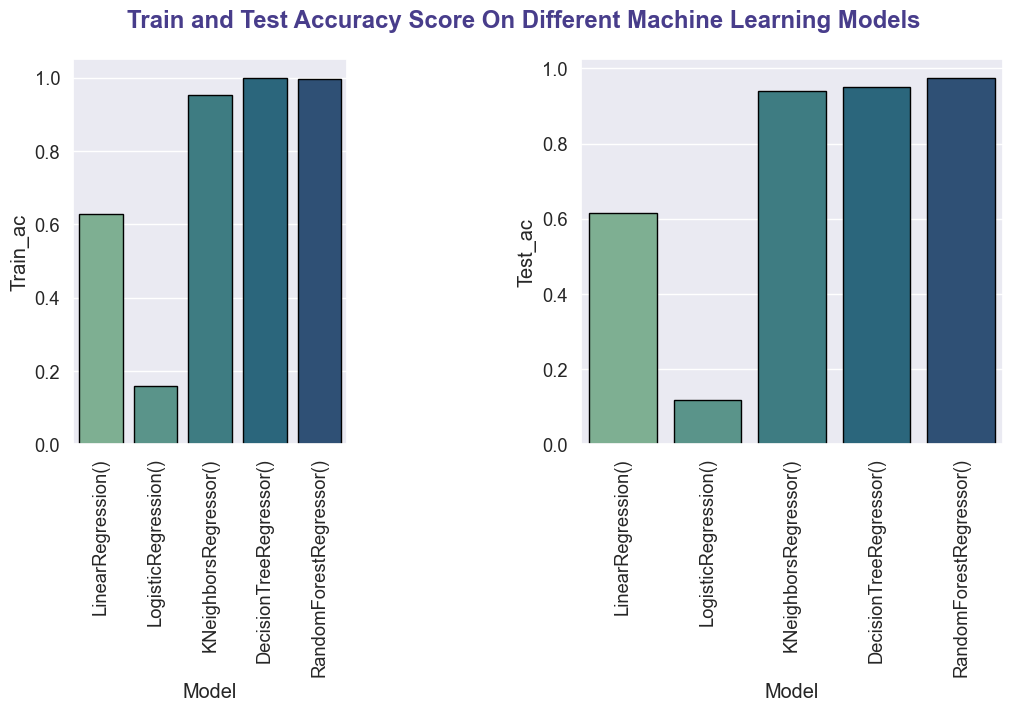

In [121]:
ma = pd.DataFrame({"Model": model,"Train_ac":train,"Test_ac":test})
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot(data=ma, x = "Model", y = "Train_ac", palette="crest", edgecolor="black")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=ma, x = "Model", y = "Test_ac",palette="crest",edgecolor="black")

plt.suptitle("Train and Test Accuracy Score On Different Machine Learning Models",fontweight="bold",color="darkslateblue")
plt.xticks(rotation = 90)
plt.show()

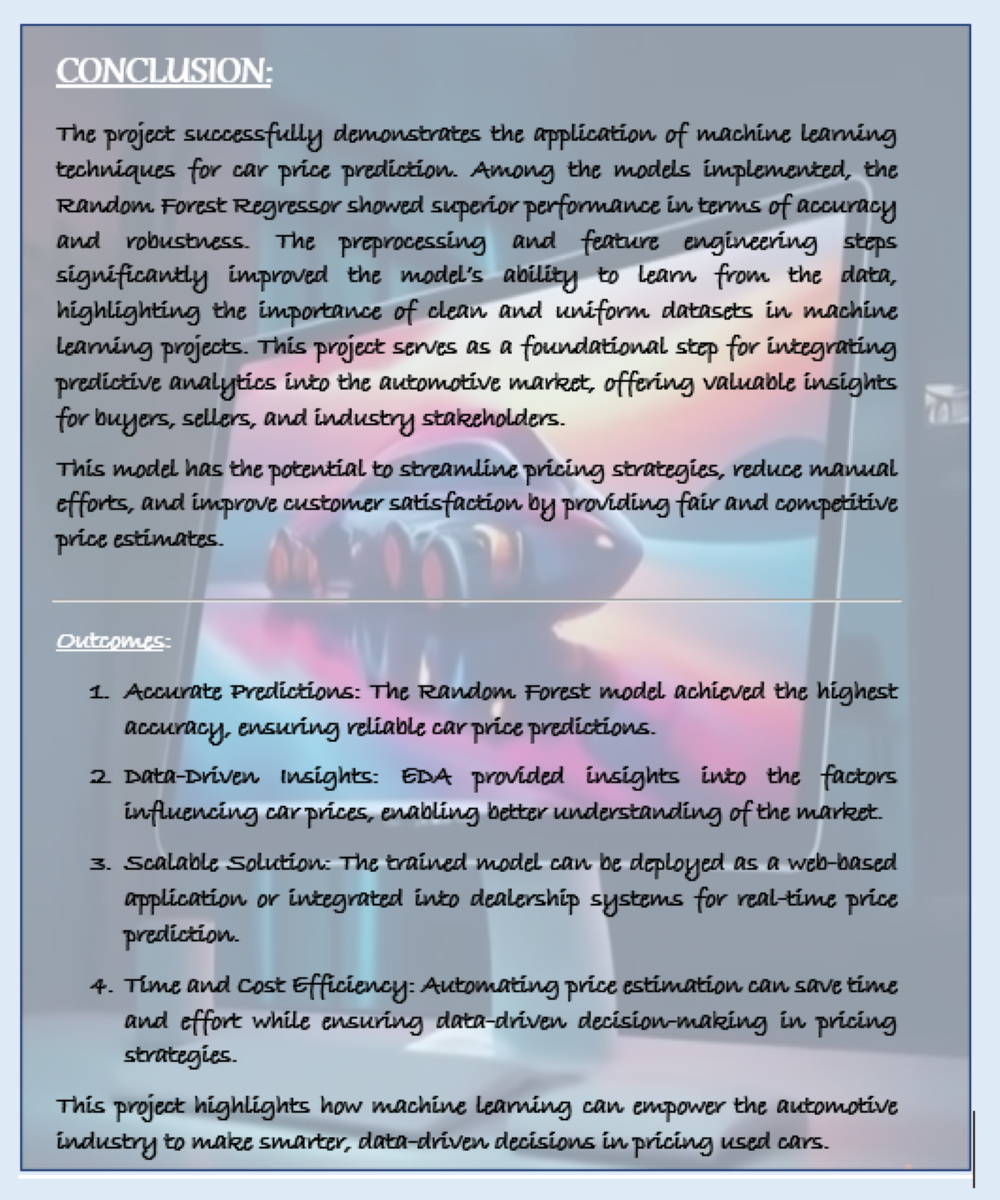